# Battle of Dazar'alor Guild Awards Analysis

<ul>
<li><a href="#collect">Collect Analysis Data</a></li>
<li><a href="#champion">Champion of the Light</a></li>
<li><a href="#jadefire">Jadefire Masters</a>
    <ul>
        <li><a href="#jf_interrupts">Interrupts</a></li>
        <li><a href="#multi-sided">Multi-Sided Strike</a></li>
        <li><a href="#jf_dispells">Dispells</a></li>
    </ul></li>
<li><a href="#grong">Grong</a>
<li><a href="#opulence">Opulence</a>
    <ul>
        <li><a href="#volatile">Volatile Charge</a></li>
        <li><a href="#punish">Flames of Punishment</a></li>
        <li><a href="#jet">Flame Jet</a></li>
    </ul></li>
<li><a href="#conclave">Conclave of the Chosen</a>
    <ul>
        <li><a href="#c_dispels">Dispels</a></li>
        <li><a href="#c_adds">Add Damage</a></li>
        <li><a href="#raptors">Jagged Claws (Raptors)</a></li>
        <li><a href="#c_frog">Krag'wa's Wrath (Frog Jumps)</a></li>
    </ul></li>
<li><a href="#rasta">Rastakhan</a>
    <ul>
        <li><a href="#r_frog">Toad Toxin</a></li>
        <li><a href="#leap">Meteor Leap</a></li>
        <li><a href="#fire">Plague of Fire</a></li>
        <li><a href="#orbs">Dread Reaping (Orbs)</a></li>
        <li><a href="#stuns">Interrupts/Stuns</a></li>
    </ul></li>
<li><a href="#mekka">Mekkatorque</a>
    <ul>
        <li><a href="#m_cc">Crowd Control</a></li>
        <li><a href="#cannon">Buster Cannon</a></li>
        <li><a href="#sheep">Sheep Shrapnel</a></li>
        <li><a href="#robot">Robot Management</a></li>
    </ul></li>
<li><a href="#stormwall">Stormwall Blockade</a>
    <ul>
        <li><a href="#seaswell">Sea Swell</a></li>
        <li><a href="#volley">Jolting Volley (Lightning)</a></li>
        <li><a href="#seastorm">Sea Storm</a></li>
        <li><a href="#robot">Robot Management</a></li>
    </ul></li>
<li><a href="#jaina">Jaina</a>
    <ul>
        <li><a href="#barrel">Barrel Removal</a></li>
        <li><a href="#avalanche">Avalanche</a></li>
        <li><a href="#pitch">Searing Pitch</a></li>
        <li><a href="#block">Frozen Solid (Ice Blocks)</a></li>
        <li><a href="#touch">Chilling Touch</a></li>
        <li><a href="#ray">Glacial Ray</a></li>
        <li><a href="#blast">Freezing Blast</a></li>
        <li><a href="#ring">Ring of Ice</a></li>
        <li><a href="#shards">Grasp of Frost (Ice Shards)</a></li>
    </ul></li>
<li><a href="#overall">Overall</a>
    <ul>
        <li><a href="#pots">Most Pots Used</a></li>
        <li><a href="#healthstone">Most Healthstones/Pots Used</a></li>
        <li><a href="#rankings">Rankings</a></li>
        <li><a href="#prog-parse">Highest Parse on Progression Kill</a></li>
        <li><a href="#least-damage">Least Damage on Progression Kills</a></li>
        <li><a href="#attendance">Attendance</a></li>
        <li><a href="#kills">Boss Kills</a></li>
    </ul></li>
</ul>

This notebook extracts information from the [Warcraft Logs](https://www.warcraftlogs.com/) API to produce data for the [Tempest](https://tempest-proudmoore.enjin.com/) Battle of Dazar'alor guild awards.

## Setup

In [3]:
# Import all required libraries and modules
import os
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warcraft_logs_fn as wl
import log_analysis as la
import api_key

In [4]:
# Import key
api_key = api_key.key

In [8]:
guild_info = wl.GUILD_INFO

# Confirm start dates for Uldir logs
fights = requests.get("https://www.warcraftlogs.com:443/v1/reports/guild/Tempest/Proudmoore/US?api_key=" + api_key)
requests_df = pd.DataFrame(fights.json())
requests_df.head()

,end,id,owner,start,title,zone
0,1558060186526,2rNJzn4Q1pZm96gt,Shadowbaine,1558058549530,MYTHIC ONE SHOT JAINA,21
1,1557982609841,pdgTJPmYfahQbB19,Shadowbaine,1557972721947,Mythic Jaina,21
2,1557895985984,fn4xtBKFvL3CR1wQ,Shadowbaine,1557885809438,Mythic Jaina,21
3,1557464164692,3Rm1jktVXyM8JYpD,slimey42,1557459376451,Battle of Dazar'alor,21
4,1557459208310,qmXPL4wD27kH86GC,slimey42,1557459208310,Mythic Jaina,-1


In [12]:
has_title = requests_df['title'].str.contains('Dazar\'alor', regex=False)
requests_df.iloc[requests_df[has_title]['start'].idxmin]

end          1548222958965
id        QDv6xHAJXzFy43mK
owner          Shadowbaine
start        1548215115013
title    Heroic Dazar'alor
zone                    21
Name: 82, dtype: object

The first log starts at 1548215115013.

In [32]:
# Get player info
player_list = pd.read_csv('player_list.csv', encoding='iso-8859-1')
player_list

,player,primary_role,alt,tier_end,tier_start,start_date
0,Irvaeryss,mdps,NaN,True,True,NaN
1,Metönymy,rdps,NaN,True,True,NaN
2,Brianjr,mdps,NaN,True,True,NaN
3,Petroll,rdps,NaN,True,True,NaN
4,Ayriea,rdps,NaN,True,True,NaN
5,Stradivarus,rdps,NaN,True,False,NaN
6,Earrl,tank,NaN,True,True,NaN
7,Illestrae,healer,NaN,True,True,NaN
8,Elzam,mdps,NaN,True,True,NaN
9,Tawn,rdps,NaN,True,True,NaN


In [17]:
# Extract logs
log_info = wl.get_logs(api_key, guild_info, log_start=1548215115013)
wl.save_logs(log_info, api_key, guild_info, log_start=1548215115013)

# Create boss list
boss_list = ['Champion of the Light', 
             'Jadefire Masters', 
             'Grong the Revenant', 
             'Opulence', 
             'Conclave of the Chosen',
             'King Rastakhan', 
             'Mekkatorque', 
             'Stormwall Blockade', 
             'Lady Jaina Proudmoore']

# Extract fight details and save
fight_df = wl.extract_fights(boss_list)
wl.create_master_list(log_info, fight_df)


All files created.

Log ID 2n6mNHytd7KPqxFY done.
Log ID 2rNJzn4Q1pZm96gt done.
Log ID 39f2VGXaFDPdqbpm done.
Log ID 3Rm1jktVXyM8JYpD done.
Log ID 48DMZQgHCAmVnXGY done.
Log ID 4r72XaA6CGbJDHdQ done.
Log ID 4yqhHd78P6JmxVgA done.
Log ID 6D3kj1MH9qdGRWh7 done.
Log ID 6hpXA92w7DyrfGFJ done.
Log ID 6vGW8nAf4Tr3YXc7 done.
Log ID 7bPmh4xrpFV2gATZ done.
Log ID 7NmgfrcMDtARwj1X done.
Log ID 83fmtrcMd1QAGbPX done.
Log ID 8A4bMkm9jrP3BdNp done.
Log ID 9BMrygDJfw71aLdv done.
Log ID Adjv2WVN3RnMJmhT done.
Log ID AmWzPKb2yBLr4TM8 done.
Log ID AXrNYJ197F2dQtGx done.
Log ID b23RxZy4LQCqvFnr done.
Log ID B6qyKdHYhA2WDr9x done.
Log ID b7GvK2hqQ6WcYV1a done.
Log ID bG3vrKFA2pwk8fcT done.
Log ID BMXcpTVq6knrtzQv done.
Log ID CAfkmZBRgWqcGwYy done.
Log ID Cnb8Px6gdNVhKQ3k done.
Log ID cpqZYhf2L4twPDH6 done.
Log ID CQBfWT87GqtR9kcH done.
Log ID dNr7AkmtTnX3Zfzp done.
Log ID DZaAn8V2YfFbgRjv done.
Log ID fdKFDvx2haZX9NQp done.
Log ID fn4xtBKFvL3CR1wQ done.
Log ID fTHwBqRDjYxzk8Vn done.
Log ID FvPtCqfMGYXp

In [18]:
# Check all players added
fight_df.player_name.unique()

array(['Mythroes', 'Hokk', 'Drshad', 'Saltimbanco', 'Tåwn', 'Kardx',
       'Shallowfall', 'Tahvi', 'Draiga', 'Psichopathic', 'Hendrx',
       'Madmoxxie', 'Fürgüs', 'Dirtnaps', 'Kopie', 'Brianjr', 'Brassi',
       'Joshbrolin', 'Kohbee', 'Illestrae', 'Battlepanda', 'Valmet',
       'Soome', 'Ayriea', 'Caydd', 'Atalya', 'Kopyedeep', 'Metönymy',
       'Toyqt', 'Jampers', 'Shadowbaine', 'Petroll', 'Elzam', 'Divinance',
       'Earrl', 'Irvaeryss', 'Velryssa', 'Tawn', 'Ultray', 'Stradivarus',
       'Psychodruid', 'Acturus', 'Ethelbeavers', 'Tahvee', 'Divanance',
       'Stradk', 'Meaculpa', 'Kopye', 'Arkamani', 'Oakinon',
       'Humanraptor', 'Velsummers', 'Basilia', 'Kurrak', 'Piankhi',
       'Shanthina', 'Roflstømpin', 'Ellerancya', 'Rolltheones', 'Äpakuli',
       'Tavee', 'Ghostmalone', 'Kushinaa', 'Lichley', 'Skumple',
       'Postcalzone', 'Magmir', 'Hocc'], dtype=object)

All players are accounted for.

<a id='collect'></a>
## Collect Analysis Data

In [77]:
# Import key and player list
#api_key = api_key.key
player_list = pd.read_csv('player_list.csv', encoding='iso-8859-1')

# Collect guild info
guild_info = wl.GUILD_INFO

log_info = wl.get_logs(api_key, guild_info, log_start=1548215115013)
wl.save_logs(log_info, api_key, guild_info, log_start=1548215115013)

# Create boss list
boss_list = ['Champion of the Light', 
             'Jadefire Masters', 
             'Grong the Revenant', 
             'Opulence', 
             'Conclave of the Chosen',
             'King Rastakhan', 
             'Mekkatorque', 
             'Stormwall Blockade', 
             'Lady Jaina Proudmoore']

# Extract fight details and save
fight_df = wl.extract_fights(boss_list)
wl.create_master_list(log_info, fight_df)

master_list = pd.read_csv('master_list.csv', encoding='iso-8859-1')
master_list = master_list[master_list.difficulty == 5] # Get mythic only


All files created.

Log ID 2n6mNHytd7KPqxFY done.
Log ID 2rNJzn4Q1pZm96gt done.
Log ID 39f2VGXaFDPdqbpm done.
Log ID 3Rm1jktVXyM8JYpD done.
Log ID 48DMZQgHCAmVnXGY done.
Log ID 4r72XaA6CGbJDHdQ done.
Log ID 4yqhHd78P6JmxVgA done.
Log ID 6D3kj1MH9qdGRWh7 done.
Log ID 6hpXA92w7DyrfGFJ done.
Log ID 6vGW8nAf4Tr3YXc7 done.
Log ID 7bPmh4xrpFV2gATZ done.
Log ID 7NmgfrcMDtARwj1X done.
Log ID 83fmtrcMd1QAGbPX done.
Log ID 8A4bMkm9jrP3BdNp done.
Log ID 9BMrygDJfw71aLdv done.
Log ID Adjv2WVN3RnMJmhT done.
Log ID AmWzPKb2yBLr4TM8 done.
Log ID AXrNYJ197F2dQtGx done.
Log ID b23RxZy4LQCqvFnr done.
Log ID B6qyKdHYhA2WDr9x done.
Log ID b7GvK2hqQ6WcYV1a done.
Log ID bG3vrKFA2pwk8fcT done.
Log ID BMXcpTVq6knrtzQv done.
Log ID CAfkmZBRgWqcGwYy done.
Log ID Cnb8Px6gdNVhKQ3k done.
Log ID cpqZYhf2L4twPDH6 done.
Log ID CQBfWT87GqtR9kcH done.
Log ID dNr7AkmtTnX3Zfzp done.
Log ID DZaAn8V2YfFbgRjv done.
Log ID fdKFDvx2haZX9NQp done.
Log ID fn4xtBKFvL3CR1wQ done.
Log ID fTHwBqRDjYxzk8Vn done.
Log ID FvPtCqfMGYXp

C:\Users\rebecca\Git-Hub-Repos\wow-analysis\warcraft_logs_fn.py:196: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, merged_df])


Log ID RdPGqtm8Jzrb2HTw done.
Log ID rv3DkQPGbxndXWmw done.
Log ID TwM7pNkXLtbfqcYG done.
Log ID vhb4rcfZyYDXWJ1w done.
Log ID WjrATb2Yg6FQxmKh done.
Log ID WN93HbRwqGgv2xyk done.
Log ID Wz1JAwcQyntVkmTb done.
Log ID X43Cz679pFkghawb done.
Log ID XAnR3r9Kt2VzmcBj done.
Log ID XDPn6wRcY1BA4JT2 done.
Log ID xQ6WYrZNRM1FLtmH done.
Log ID Y4zAXFLKxcdHMhgr done.
Log ID yf7rDvctTVZzLHBj done.
Log ID YGNFr2MH37zXD9Th done.
Log ID YMdTDp37JnKLbw1j done.
Log ID YPtpwXbAVNgmGr6L done.

Dataframe created.

Dataframe cleaned.

Master dataframe created.

master_list saved.


In [24]:
# Confirm boss IDs
boss_info = ['boss_id', 'boss_name']
master_list.drop_duplicates(subset=boss_info)[boss_info]

,boss_id,boss_name
224,2281,Lady Jaina Proudmoore
970,2265,Champion of the Light
1010,2266,Jadefire Masters
1050,2263,Grong the Revenant
1090,2271,Opulence
1150,2268,Conclave of the Chosen
1210,2272,King Rastakhan
1290,2276,Mekkatorque
1830,2280,Stormwall Blockade


<a id='champion'></a>
## Champion of the Light

Interrupt Spell IDs:
- Mage: Counterspell (2139), ~~Dragon's Breath (31661)~~
- Druid: Solar Beam (78675), Skull Bash (106839)
- Warrior: Pummel (6552), Intimidating Shout (5246)
- Hunter: Counter Shot (147362), ~~Concussive Shot (5116)~~
- Rogue: Kick (1766), ~~Kidney Shot (408)~~
- DH: Consume Magic (183752)
- Shaman: Wind Shear (57994), Lightning/Cap Totem (192058)
- Paladin: Rebuke (96231), Hammer of Justice (853)
- Monk: Spear Hand Strike (116705), Leg Sweep (119381)
- DK: Mind Freeze (47528)
- Warlock: ~~Spell Lock - pet (19647)~~
- Priest: Silence - Shadow (15487), ~~Holy Word: Chastise (88625)~~

In [138]:
interrupt_ids = [2139, 78675, 106839, 6552, 5246, 147362, 1766, 183752, 
             57994, 192058, 96231, 853, 116705, 119381, 47528, 15487]

In [39]:
champion_interrupts = pd.DataFrame([], columns=['log_id', 'spell_id', 'player', 'count'])

for spell_id in spell_ids:
    try:
        print('Spell Id:', spell_id)
        spell_df = wl.cast_count(api_key, master_list, spell_id, boss_id=2265)
        champion_interrupts = pd.concat([champion_interrupts, spell_df])
    except:
        continue

Spell Id: 2139
Player added: Petroll
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Petroll
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Petroll
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Spell Id: 31661
Spell Id: 78675
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Spell Id: 106839
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Spell Id: 6552
Player added: Elzam
Player added: Elzam
Player added: Velryssa
Player added: Elzam
Player added: Elzam
P

Player added: Toyqt
Spell Id: 171140
Spell Id: 116705
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Spell Id: 119381
Player added: Divinance
Spell Id: 47528
Player added: Divanance
Player added: Stradk
Player added: Ethelbeavers
Player added: Divanance
Player added: Divanance
Player added: Ethelbeavers
Player added: Ethelbeavers
Player added: Atalya
Spell Id: 19647
Spell Id: 15487
Player added: Stradivarus
Player added: Stradivarus
Player added: Stradivarus
Spell Id: 88625


In [157]:
bins = np.arange(0, 4.5, 0.5)

         player  count  fight_count primary_role  av_count
24         Tawn   19.0            5         rdps  3.800000
5     Divinance   32.0           11         tank  2.909091
2        Ayriea   17.0            7         rdps  2.428571
23       Tahvee   16.0            7         rdps  2.285714
17      Petroll   25.0           11         rdps  2.272727
15     Metönymy   22.0           11         rdps  2.000000
20        Soome   10.0            5         rdps  2.000000
27       Valmet   21.0           11         mdps  1.909091
25        Toyqt   19.0           10         mdps  1.900000
7         Elzam   12.0            7         mdps  1.714286
18  Psychodruid   11.0            7         rdps  1.571429
13       Kohbee    9.0            6         rdps  1.500000
3       Brianjr   14.0           10         mdps  1.400000
11    Irvaeryss    8.0            7         mdps  1.142857
6         Earrl   10.0           11         tank  0.909091
21  Stradivarus    3.0            4         rdps  0.7500

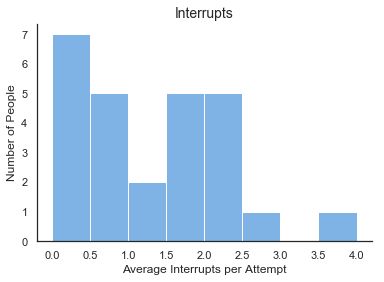

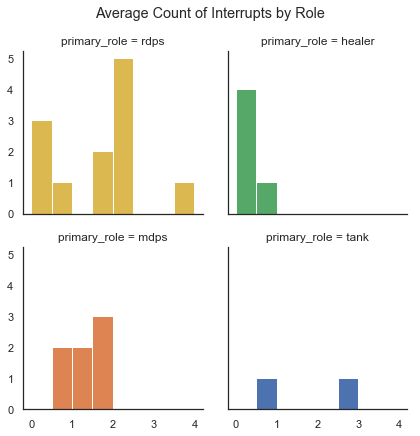

Mean is 1.239042 per attempt.
Median is 1.271429 per attempt.
Max attempts by player is 11.


In [158]:
la.collect_stats(data=champion_interrupts, master_list=master_list, player_list=player_list, 
                 boss_name='Champion of the Light', boss_id=2265, spell_name='Interrupts', 
                 analysis_columns=['count'], min_attempts=1, least=False, bins=bins)

<a id='jadefire'></a>
## Jadefire Masters

<a id='jf_interrupts'></a>
### Interrupts

In [96]:
jadefire_interrupts = pd.DataFrame([], columns=['log_id', 'spell_id', 'player', 'count'])

for spell_id in interrupt_ids:
    try:
        print('Spell Id:', spell_id)
        spell_df = wl.cast_count(api_key, master_list, spell_id, boss_id=2265)
        jadefire_interrupts = pd.concat([jadefire_interrupts, spell_df])
    except:
        continue

Spell Id: 2139
Player added: Petroll
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Petroll
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Petroll
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Spell Id: 78675
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Spell Id: 106839
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Spell Id: 6552
Player added: Elzam
Player added: Elzam
Player added: Velryssa
Player added: Elzam
Player added: Elzam
Player added: Vel

Player added: Ethelbeavers
Player added: Divanance
Player added: Divanance
Player added: Ethelbeavers
Player added: Ethelbeavers
Player added: Atalya
Spell Id: 15487
Player added: Stradivarus
Player added: Stradivarus
Player added: Stradivarus


In [131]:
bins = np.arange(0, 0.9, 0.1)

         player  count  fight_count primary_role  av_count
5     Divinance   32.0           40         tank  0.800000
17      Petroll   25.0           40         rdps  0.625000
25        Toyqt   19.0           31         mdps  0.612903
23       Tahvee   16.0           27         rdps  0.592593
15     Metönymy   22.0           40         rdps  0.550000
27       Valmet   21.0           40         mdps  0.525000
24         Tawn   19.0           37         rdps  0.513514
2        Ayriea   17.0           37         rdps  0.459459
3       Brianjr   14.0           34         mdps  0.411765
18  Psychodruid   11.0           29         rdps  0.379310
7         Elzam   12.0           32         mdps  0.375000
6         Earrl   10.0           40         tank  0.250000
11    Irvaeryss    8.0           34         mdps  0.235294
10    Illestrae    5.0           40       healer  0.125000
21  Stradivarus    3.0           32         rdps  0.093750
12      Jampers    0.0           40       healer  0.0000

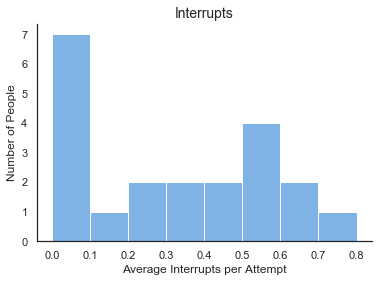

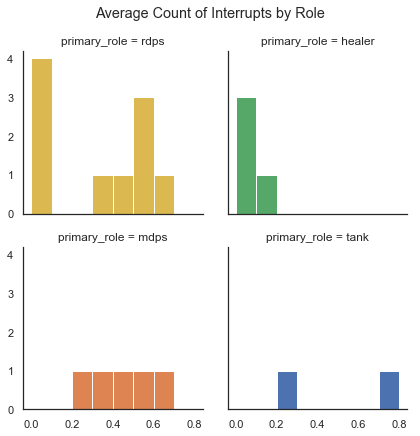

Mean is 0.311838 per attempt.
Median is 0.375000 per attempt.
Max attempts by player is 40.


In [132]:
la.collect_stats(data=jadefire_interrupts, master_list=master_list, player_list=player_list, 
                 boss_name='Jadefire Masters', boss_id=2266, spell_name='Interrupts', 
                 analysis_columns=['count'], min_attempts=15, least=False, bins=bins)

<a id='jf_dispells'></a>
### Dispells

Spell IDs:
- Priest: Purify (527), Mass Dispel (32375)
- Paladin: Cleanse (4987)
- Shaman: Purify Spirit (77130)
- Druid: Nature's Cure (88423)
- Monk: Detox (115450)

In [101]:
jadefire_dispells = pd.DataFrame([], columns=['log_id', 'spell_id', 'player', 'count'])

dispell_ids = [527, 32375, 4987, 77130, 88423, 115450]

for spell_id in dispell_ids:
    try:
        print('Spell Id:', spell_id)
        spell_df = wl.cast_count(api_key, master_list, spell_id, boss_id=2265)
        jadefire_dispells = pd.concat([jadefire_dispells, spell_df])
    except:
        continue

Spell Id: 527
Player added: Mythroes
Player added: Mythroes
Player added: Mythroes
Player added: Mythroes
Player added: Mythroes
Player added: Mythroes
Spell Id: 32375
Spell Id: 4987
Player added: Acturus
Player added: Acturus
Player added: Acturus
Player added: Acturus
Player added: Acturus
Player added: Acturus
Player added: Acturus
Player added: Acturus
Player added: Acturus
Spell Id: 77130
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Spell Id: 88423
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Spell Id: 115450
Player added: Caydd
Player added: Caydd
Player added: Caydd
Player added: Caydd
Player added: Caydd
Player added: Caydd


In [135]:
bins = np.arange(0.5, 1.5, 0.1)

         player  count  fight_count primary_role  av_count
12      Jampers   41.0           40       healer  1.025000
10    Illestrae   33.0           40       healer  0.825000
0       Acturus   29.0           40       healer  0.725000
16     Mythroes   24.0           37       healer  0.648649
17      Petroll    0.0           40         rdps  0.000000
26       Ultray    0.0           35         rdps  0.000000
25        Toyqt    0.0           31         mdps  0.000000
24         Tawn    0.0           37         rdps  0.000000
23       Tahvee    0.0           27         rdps  0.000000
21  Stradivarus    0.0           32         rdps  0.000000
19  Shadowbaine    0.0           20         rdps  0.000000
18  Psychodruid    0.0           29         rdps  0.000000
15     Metönymy    0.0           40         rdps  0.000000
2        Ayriea    0.0           37         rdps  0.000000
14    Kopyedeep    0.0           39         rdps  0.000000
11    Irvaeryss    0.0           34         mdps  0.0000

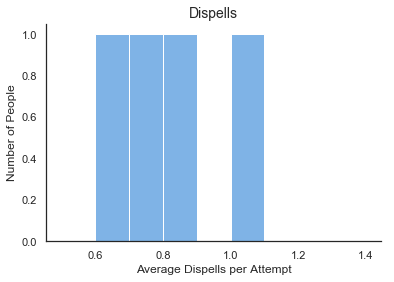

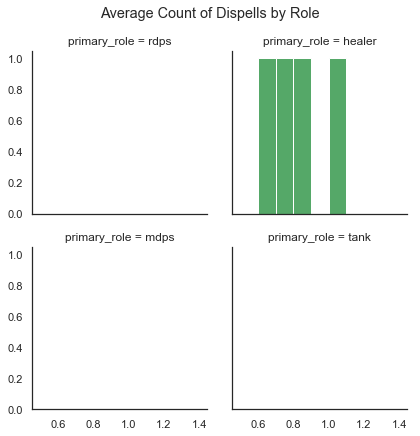

Mean is 0.153507 per attempt.
Median is 0.000000 per attempt.
Max attempts by player is 40.


In [136]:
la.collect_stats(data=jadefire_dispells, master_list=master_list, player_list=player_list, 
                 boss_name='Jadefire Masters', boss_id=2266, spell_name='Dispells', 
                 analysis_columns=['count'], min_attempts=15, least=False, bins=bins)

<a id='multi-sided'></a>
### Multi-Sided Strike

Spell ID: 284028

In [104]:
multi_sided = wl.damage_taken(api_key, master_list, 284028, boss_id=2266, hit_type='hitCount')

Player added: Valmet
Player added: Jampers
Player added: Illestrae
Player added: Ayriea
Player added: Atalya
Player added: Ayriea
Player added: Stradivarus
Player added: Earrl
Player added: Valmet
Player added: Petroll
Player added: Psychodruid
Player added: Jampers
Player added: Brianjr
Player added: Jampers
Player added: Petroll
Player added: Jampers
Player added: Toyqt
Player added: Valmet
Player added: Earrl
Player added: Metönymy
Player added: Brianjr
Player added: Shadowbaine
Player added: Stradivarus
Player added: Petroll
Player added: Illestrae
Player added: Ultray
Player added: Ayriea
Player added: Tawn
Player added: Shadowbaine
Player added: Jampers
Player added: Shadowbaine
Player added: Jampers
Player added: Earrl
Player added: Brianjr
Player added: Petroll


In [114]:
bins = np.arange(0, 0.5, 0.05)

         player  hits  damage_taken  fight_count primary_role  av_count
0       Acturus   0.0           0.0           40       healer  0.000000
23       Tahvee   0.0           0.0           27         rdps  0.000000
16     Mythroes   0.0           0.0           37       healer  0.000000
5     Divinance   0.0           0.0           40         tank  0.000000
14    Kopyedeep   0.0           0.0           39         rdps  0.000000
7         Elzam   0.0           0.0           32         mdps  0.000000
11    Irvaeryss   0.0           0.0           34         mdps  0.000000
15     Metönymy   1.0       89813.0           40         rdps  0.025000
24         Tawn   1.0       89897.0           37         rdps  0.027027
26       Ultray   1.0       91979.0           35         rdps  0.028571
25        Toyqt   1.0       96577.0           31         mdps  0.032258
18  Psychodruid   2.0      179448.0           29         rdps  0.068966
3       Brianjr   3.0      280235.0           34         mdps  0

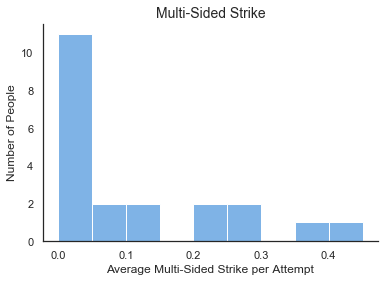

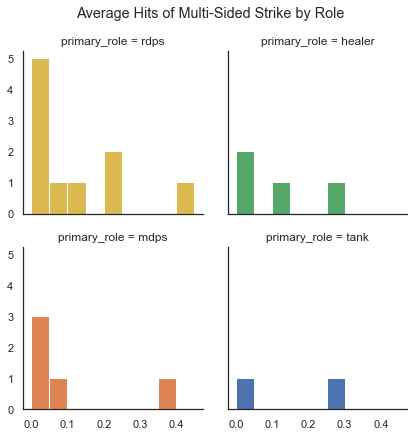

Mean is 0.106996 per attempt.
Median is 0.032258 per attempt.
Max attempts by player is 40.


In [127]:
la.collect_stats(data=multi_sided, master_list=master_list, player_list=player_list, 
                 boss_name='Jadefire Masters', boss_id=2266, spell_name='Multi-Sided Strike', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=15, bins=bins)

<a id='grong'></a>
## Grong

<a id='g_interrupts'></a>
### Interrupts

In [139]:
grong_interrupts = pd.DataFrame([], columns=['log_id', 'spell_id', 'player', 'count'])

for spell_id in interrupt_ids:
    try:
        print('Spell Id:', spell_id)
        spell_df = wl.cast_count(api_key, master_list, spell_id, boss_id=2263)
        grong_interrupts = pd.concat([grong_interrupts, spell_df])
    except:
        continue

Spell Id: 2139
Player added: Petroll
Player added: Metönymy
Player added: Tawn
Player added: Metönymy
Player added: Petroll
Player added: Metönymy
Player added: Petroll
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Tawn
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Petroll
Player added: Metönymy
Player added: Tawn
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Petroll
Spell Id: 78675
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Psychodruid
Player added: Psychodruid
Player added: Soome
Player added: Soome
Player added: Psychodruid
Spell Id: 106839
Player added: Earrl
Player added: Earrl
Player added: Earrl
Spell Id: 6552
Player added: Velryssa
Player added: Elzam
Player added: Velryssa
Player added: Elzam
Player added: Elzam
Player added: Elzam
Player added: Velryssa
Player added: Elzam
Pla

Spell Id: 15487
Player added: Stradivarus
Player added: Stradivarus
Player added: Stradivarus


In [154]:
bins = np.arange(0, 5.5, 0.5)

         player  count  fight_count primary_role  av_count
27       Valmet  193.0           42         mdps  4.595238
7         Elzam  167.0           40         mdps  4.175000
17      Petroll  166.0           42         rdps  3.952381
3       Brianjr  123.0           41         mdps  3.000000
24         Tawn  101.0           39         rdps  2.589744
2        Ayriea   27.0           11         rdps  2.454545
13       Kohbee   99.0           41         rdps  2.414634
15     Metönymy   69.0           37         rdps  1.864865
23       Tahvee   60.0           33         rdps  1.818182
18  Psychodruid   17.0           12         rdps  1.416667
10    Illestrae   23.0           42       healer  0.547619
21  Stradivarus   17.0           35         rdps  0.485714
25        Toyqt    6.0           38         mdps  0.157895
0       Acturus    5.0           42       healer  0.119048
6         Earrl    3.0           42         tank  0.071429
12      Jampers    0.0           42       healer  0.0000

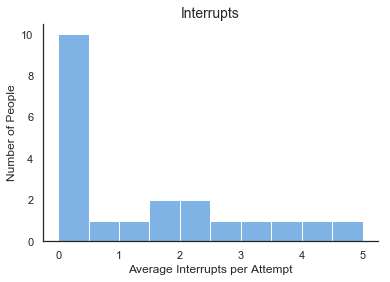

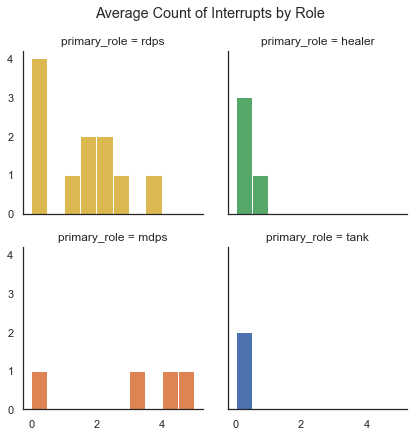

Mean is 1.412522 per attempt.
Median is 0.547619 per attempt.
Max attempts by player is 42.


In [156]:
la.collect_stats(data=grong_interrupts, master_list=master_list, player_list=player_list, 
                 boss_name='Grong', boss_id=2263, spell_name='Interrupts', 
                 analysis_columns=['count'], min_attempts=10, least=False, bins=bins)

<a id='opulence'></a>
## Opulence

<a id='volatile'></a>
### Volatile Charge

Spell IDs: 
- 283574
- 287648
- 283557

In [159]:
vc_ids = [283574, 287648, 283557]

volatile_charge = surging_darkness = pd.DataFrame([], columns=['log_id', 'spell_id','player', 
                                             'hits', 'damage_taken'])

for charge_id in vc_ids:
    id_df = wl.damage_taken(api_key, master_list, charge_id, boss_id=2271, hit_type='hitCount')
    volatile_charge = pd.concat([volatile_charge, id_df])

Player added: Jampers
Player added: Psychodruid
Player added: Petroll
Player added: Ultray
Player added: Velryssa
Player added: Jampers
Player added: Ultray
Player added: Ayriea
Player added: Kopyedeep
Player added: Psychodruid
Player added: Toyqt
Player added: Elzam
Player added: Tawn
Player added: Stradivarus
Player added: Metönymy
Player added: Earrl
Player added: Mythroes
Player added: Irvaeryss
Player added: Kohbee
Player added: Petroll
Player added: Brianjr
Player added: Valmet
Player added: Jampers
Player added: Stradivarus
Player added: Stradivarus
Player added: Mythroes
Player added: Toyqt
Player added: Kopyedeep
Player added: Psychodruid
Player added: Jampers
Player added: Brianjr
Player added: Divinance
Player added: Stradivarus
Player added: Acturus
Player added: Ultray
Player added: Shadowbaine
Player added: Petroll
Player added: Ayriea
Player added: Elzam
Player added: Illestrae
Player added: Mythroes
Player added: Kohbee
Player added: Metönymy
Player added: Earrl
Player 

Player added: Psychodruid
Player added: Brianjr
Player added: Caydd
Player added: Irvaeryss
Player added: Petroll
Player added: Toyqt
Player added: Acturus
Player added: Elzam
Player added: Earrl
Player added: Illestrae
Player added: Shadowbaine
Player added: Ultray
Player added: Shadowbaine
Player added: Tawn
Player added: Petroll
Player added: Toyqt
Player added: Divinance
Player added: Petroll
Player added: Elzam
Player added: Kohbee
Player added: Irvaeryss
Player added: Jampers
Player added: Brianjr
Player added: Toyqt
Player added: Earrl
Player added: Tawn
Player added: Psychodruid
Player added: Tahvee
Player added: Valmet
Player added: Metönymy
Player added: Ultray
Player added: Illestrae
Player added: Ayriea
Player added: Caydd
Player added: Jampers
Player added: Shadowbaine
Player added: Tawn
Player added: Psychodruid
Player added: Kohbee
Player added: Mythroes
Player added: Metönymy
Player added: Petroll
Player added: Kopyedeep
Player added: Soome
Player added: Toyqt
Player ad

In [162]:
bins = np.arange(0.05, 0.8, 0.1)

         player  hits  damage_taken  fight_count primary_role  av_count
0       Acturus   7.0      928742.0           90       healer  0.077778
5     Divinance  11.0     1124574.0           90         tank  0.122222
28     Velryssa   4.0     1328444.0           30         mdps  0.133333
10    Illestrae  19.0     3889534.0           90       healer  0.211111
13       Kohbee  22.0     5316205.0           87         rdps  0.252874
2        Ayriea  26.0     5055767.0           80         rdps  0.325000
25        Toyqt  29.0     7034668.0           87         mdps  0.333333
24         Tawn  29.0     6340687.0           86         rdps  0.337209
27       Valmet  32.0     5928077.0           90         mdps  0.355556
6         Earrl  34.0     3854306.0           90         tank  0.377778
21  Stradivarus  23.0     3856130.0           60         rdps  0.383333
7         Elzam  32.0     4731975.0           78         mdps  0.410256
18  Psychodruid  38.0     7325156.0           86         rdps  0

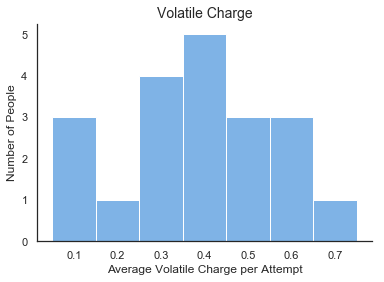

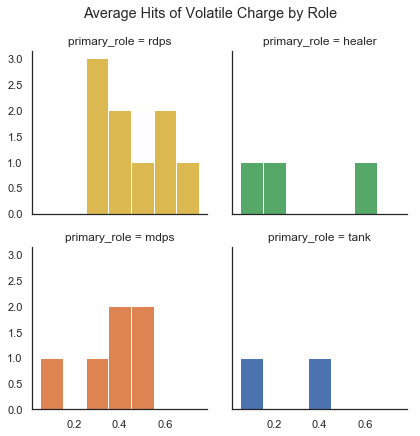

Mean is 0.419122 per attempt.
Median is 0.396795 per attempt.
Max attempts by player is 90.


In [163]:
la.collect_stats(data=volatile_charge, master_list=master_list, player_list=player_list, 
                 boss_name='Opulence', boss_id=2271, spell_name='Volatile Charge', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=30, bins=bins)

<a id='punish'></a>
### Flames of Punishment

Spell IDs:
- 287513
- 283063

In [164]:
fp_ids = [287513, 283063]

flames_punish = pd.DataFrame([], columns=['log_id', 'spell_id','player', 
                                             'hits', 'damage_taken'])

for flame_id in fp_ids:
    id_df = wl.damage_taken(api_key, master_list, charge_id, boss_id=2271, hit_type='hitCount')
    flames_punish = pd.concat([volatile_charge, id_df])

Player added: Psychodruid
Player added: Tahvee
Player added: Stradivarus
Player added: Ultray
Player added: Kopyedeep
Player added: Brianjr
Player added: Ayriea
Player added: Illestrae
Player added: Brianjr
Player added: Earrl
Player added: Metönymy
Player added: Kopyedeep
Player added: Stradivarus
Player added: Ultray
Player added: Jampers
Player added: Petroll
Player added: Kohbee
Player added: Mythroes
Player added: Psychodruid
Player added: Elzam
Player added: Kopyedeep
Player added: Toyqt
Player added: Metönymy
Player added: Psychodruid
Player added: Mythroes
Player added: Shadowbaine
Player added: Irvaeryss
Player added: Metönymy
Player added: Valmet
Player added: Petroll
Player added: Ultray
Player added: Jampers
Player added: Toyqt
Player added: Earrl
Player added: Soome
Player added: Jampers
Player added: Shadowbaine
Player added: Psychodruid
Player added: Stradivarus
Player added: Metönymy
Player added: Toyqt
Player added: Shadowbaine
Player added: Ayriea
Player added: Irvaer

In [166]:
bins = np.arange(0.1, 1.2, 0.1)

         player  hits  damage_taken  fight_count primary_role  av_count
0       Acturus  10.0     1323307.0           90       healer  0.111111
28     Velryssa   4.0     1328444.0           30         mdps  0.133333
5     Divinance  15.0     1501617.0           90         tank  0.166667
10    Illestrae  24.0     4526324.0           90       healer  0.266667
13       Kohbee  31.0     6511540.0           87         rdps  0.356322
24         Tawn  37.0     7430359.0           86         rdps  0.430233
27       Valmet  39.0     6704952.0           90         mdps  0.433333
25        Toyqt  38.0     8199422.0           87         mdps  0.436782
6         Earrl  42.0     4673570.0           90         tank  0.466667
2        Ayriea  38.0     6654160.0           80         rdps  0.475000
21  Stradivarus  32.0     4721153.0           60         rdps  0.533333
7         Elzam  42.0     5920671.0           78         mdps  0.538462
11    Irvaeryss  46.0     5806316.0           83         mdps  0

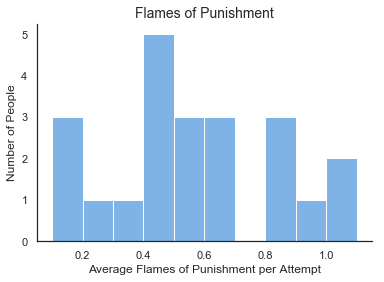

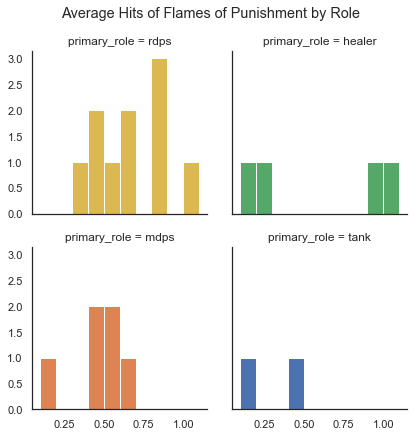

Mean is 0.570578 per attempt.
Median is 0.535897 per attempt.
Max attempts by player is 90.


In [167]:
la.collect_stats(data=flames_punish, master_list=master_list, player_list=player_list, 
                 boss_name='Opulence', boss_id=2271, spell_name='Flames of Punishment', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=30, bins=bins)

<a id='jet'></a>
### Flame Jet

Spell ID: 285479

In [170]:
flame_jet = wl.damage_taken(api_key, master_list, 285479, boss_id=2271, hit_type='tickCount')

Player added: Stradivarus
Player added: Kohbee
Player added: Toyqt
Player added: Divinance
Player added: Velryssa
Player added: Shadowbaine
Player added: Earrl
Player added: Brianjr
Player added: Valmet
Player added: Irvaeryss
Player added: Ultray
Player added: Metönymy
Player added: Illestrae
Player added: Petroll
Player added: Tahvee
Player added: Psychodruid
Player added: Acturus
Player added: Mythroes
Player added: Jampers
Player added: Kopyedeep
Player added: Illestrae
Player added: Stradivarus
Player added: Ultray
Player added: Kohbee
Player added: Tawn
Player added: Irvaeryss
Player added: Earrl
Player added: Toyqt
Player added: Divinance
Player added: Mythroes
Player added: Petroll
Player added: Metönymy
Player added: Jampers
Player added: Elzam
Player added: Ayriea
Player added: Psychodruid
Player added: Brianjr
Player added: Kopyedeep
Player added: Acturus
Player added: Valmet
Player added: Ultray
Player added: Valmet
Player added: Ayriea
Player added: Kohbee
Player added: Ko

In [172]:
bins = np.arange(1, 9, 0.5)

         player   hits  damage_taken  fight_count primary_role  av_count
10    Illestrae  103.0     7431631.0           90       healer  1.144444
6         Earrl  111.0     7252110.0           90         tank  1.233333
12      Jampers  112.0     8540790.0           90       healer  1.244444
16     Mythroes   95.0     7304832.0           69       healer  1.376812
15     Metönymy  124.0     7734287.0           90         rdps  1.377778
2        Ayriea  115.0     8665227.0           80         rdps  1.437500
7         Elzam  126.0     9499253.0           78         mdps  1.615385
25        Toyqt  145.0    10895082.0           87         mdps  1.666667
0       Acturus  156.0    11707282.0           90       healer  1.733333
11    Irvaeryss  149.0     9301657.0           83         mdps  1.795181
17      Petroll  167.0    12470580.0           90         rdps  1.855556
21  Stradivarus  117.0     7902248.0           60         rdps  1.950000
24         Tawn  173.0    12869516.0           86  

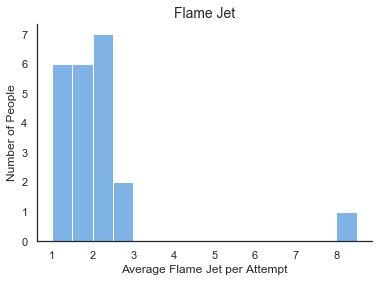

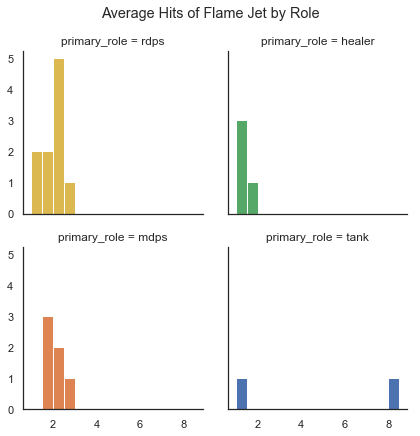

Mean is 2.151126 per attempt.
Median is 1.902778 per attempt.
Max attempts by player is 90.


In [173]:
la.collect_stats(data=flame_jet, master_list=master_list, player_list=player_list, 
                 boss_name='Opulence', boss_id=2271, spell_name='Flame Jet', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=30, bins=bins)

<a id='conclave'></a>
## Conclave of the Chosen

<a id='c_dispels'></a>
### Dispels

Only for curses. Spell IDs:
- Shaman: Purify Spirit (77130)
- Druid: Nature's Cure (88423)
- Mage: Remove Curse (475)

In [174]:
conclave_dispells = pd.DataFrame([], columns=['log_id', 'spell_id', 'player', 'count'])

dispel_ids = [77130, 88423, 475]

for spell_id in dispel_ids:
    try:
        print('Spell Id:', spell_id)
        spell_df = wl.cast_count(api_key, master_list, spell_id, boss_id=2265)
        conclave_dispells = pd.concat([conclave_dispells, spell_df])
    except:
        continue

Spell Id: 77130
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Spell Id: 88423
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Player added: Jampers
Spell Id: 475


         player  count  fight_count primary_role  av_count
12      Jampers   41.0           51       healer  0.803922
10    Illestrae   33.0           51       healer  0.647059
0       Acturus    0.0           51       healer  0.000000
16     Mythroes    0.0           36       healer  0.000000
27       Valmet    0.0           43         mdps  0.000000
26       Ultray    0.0           48         rdps  0.000000
25        Toyqt    0.0           41         mdps  0.000000
24         Tawn    0.0           47         rdps  0.000000
23       Tahvee    0.0           19         rdps  0.000000
21  Stradivarus    0.0           33         rdps  0.000000
20        Soome    0.0            2         rdps  0.000000
19  Shadowbaine    0.0           51         rdps  0.000000
18  Psychodruid    0.0           26         rdps  0.000000
17      Petroll    0.0           51         rdps  0.000000
15     Metönymy    0.0           51         rdps  0.000000
1        Atalya    0.0            3         mdps  0.0000

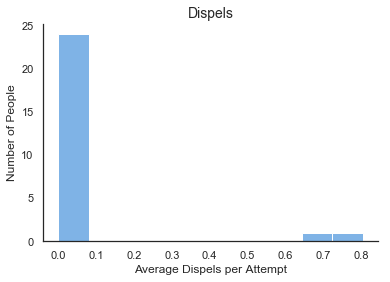

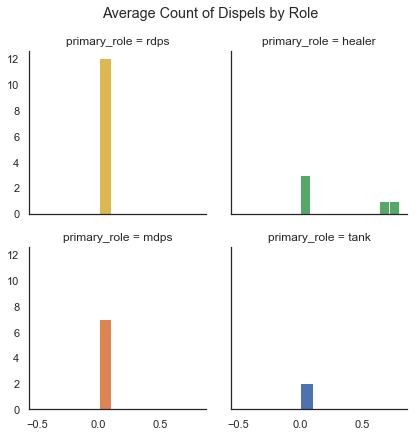

Mean is 0.055807 per attempt.
Median is 0.000000 per attempt.
Max attempts by player is 51.


In [177]:
la.collect_stats(data=conclave_dispells, master_list=master_list, player_list=player_list, 
                 boss_name='Conclave', boss_id=2268, spell_name='Dispels', 
                 analysis_columns=['count'], least=False, min_attempts=1)

<a id='c_adds'></a>
### Add Damage Done

In [178]:
adds = wl.damage_done(api_key, master_list, boss_id=2268)

Player added: Tahvee
Player added: Irvaeryss
Player added: Shadowbaine
Player added: Psychodruid
Player added: Ultray
Player added: Jampers
Player added: Ayriea
Player added: Metönymy
Player added: Velryssa
Player added: Kohbee
Player added: Mythroes
Player added: Toyqt
Player added: Valmet
Player added: Kopyedeep
Player added: Caydd
Player added: Petroll
Player added: Acturus
Player added: Earrl
Player added: Illestrae
Player added: Stradivarus
Player added: Divinance
Player added: Metönymy
Player added: Caydd
Player added: Divinance
Player added: Psychodruid
Player added: Tawn
Player added: Elzam
Player added: Stradivarus
Player added: Ayriea
Player added: Kohbee
Player added: Acturus
Player added: Brianjr
Player added: Kopyedeep
Player added: Irvaeryss
Player added: Earrl
Player added: Petroll
Player added: Jampers
Player added: Ultray
Player added: Shadowbaine
Player added: Mythroes
Player added: Illestrae
Player added: Earrl
Player added: Toyqt
Player added: Irvaeryss
Player added

In [181]:
bins = np.arange(1.5e04, 1.5e06, 1e05)

         player  damage_done  fight_count primary_role      av_count
18  Psychodruid   32224403.0           26         rdps  1.239400e+06
21  Stradivarus   38885641.0           33         rdps  1.178353e+06
19  Shadowbaine   54555889.0           51         rdps  1.069723e+06
2        Ayriea   47665937.0           50         rdps  9.533187e+05
27       Valmet   37747844.0           43         mdps  8.778568e+05
11    Irvaeryss   33309218.0           51         mdps  6.531219e+05
15     Metönymy   31519506.0           51         rdps  6.180295e+05
7         Elzam   23640746.0           42         mdps  5.628749e+05
14    Kopyedeep   21415676.0           45         rdps  4.759039e+05
24         Tawn   21603928.0           47         rdps  4.596580e+05
26       Ultray   21071491.0           48         rdps  4.389894e+05
17      Petroll   20876801.0           51         rdps  4.093490e+05
3       Brianjr   17720081.0           48         mdps  3.691684e+05
13       Kohbee   11858753.0      

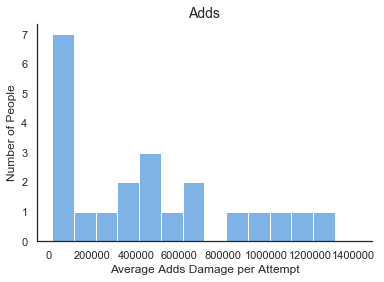

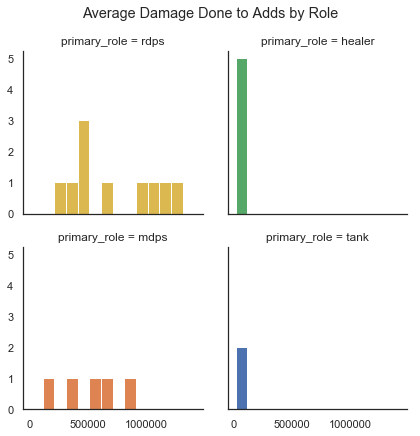

Mean is 462089.202516 per attempt.
Median is 424169.217525 per attempt.
Max attempts by player is 51.


In [182]:
la.collect_stats(data=adds, master_list=master_list, player_list=player_list, 
                 boss_name="Conclave", boss_id=2268, spell_name='Adds', 
                 analysis_columns=['damage_done'], min_attempts=20, least=False, bins=bins)

<a id='raptors'></a>
### Jagged Claws (Raptors)

Damage from adds. Spell ID: 286673

In [183]:
jagged_claws = wl.damage_taken(api_key, master_list, 286673, boss_id=2268, hit_type='hitCount')

Player added: Acturus
Player added: Jampers
Player added: Mythroes
Player added: Velryssa
Player added: Shadowbaine
Player added: Ultray
Player added: Kopyedeep
Player added: Petroll
Player added: Kohbee
Player added: Earrl
Player added: Stradivarus
Player added: Caydd
Player added: Metönymy
Player added: Valmet
Player added: Irvaeryss
Player added: Divinance
Player added: Illestrae
Player added: Tahvee
Player added: Psychodruid
Player added: Ayriea
Player added: Petroll
Player added: Stradivarus
Player added: Brianjr
Player added: Mythroes
Player added: Kopyedeep
Player added: Irvaeryss
Player added: Illestrae
Player added: Ayriea
Player added: Tawn
Player added: Psychodruid
Player added: Ultray
Player added: Shadowbaine
Player added: Metönymy
Player added: Kohbee
Player added: Elzam
Player added: Jampers
Player added: Caydd
Player added: Earrl
Player added: Divinance
Player added: Acturus
Player added: Mythroes
Player added: Irvaeryss
Player added: Kohbee
Player added: Ultray
Player 

In [190]:
bins = np.arange(0.5, 4, 0.5)

         player   hits  damage_taken  fight_count primary_role  av_count
27       Valmet   26.0     2862146.0           43         mdps  0.604651
2        Ayriea   34.0     3777364.0           50         rdps  0.680000
21  Stradivarus   23.0     2150790.0           33         rdps  0.696970
24         Tawn   34.0     4310623.0           47         rdps  0.723404
15     Metönymy   40.0     5062303.0           51         rdps  0.784314
13       Kohbee   33.0     3606118.0           40         rdps  0.825000
17      Petroll   44.0     5740435.0           51         rdps  0.862745
18  Psychodruid   23.0     2324315.0           26         rdps  0.884615
19  Shadowbaine   55.0     6939839.0           51         rdps  1.078431
16     Mythroes   40.0     4736263.0           36       healer  1.111111
3       Brianjr   56.0     6858512.0           48         mdps  1.166667
26       Ultray   60.0     7706038.0           48         rdps  1.250000
25        Toyqt   55.0     4747329.0           41  

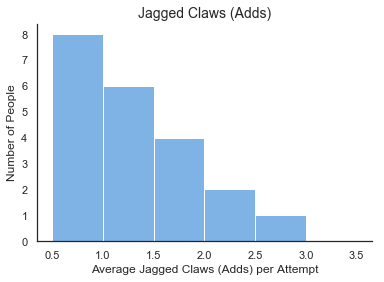

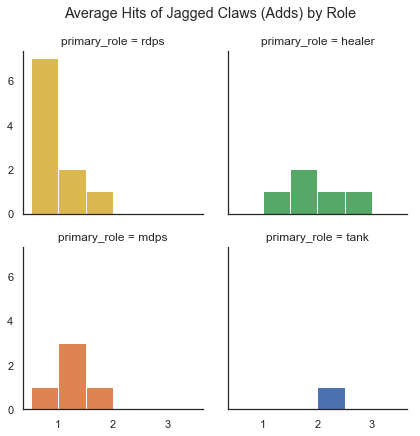

Mean is 1.382702 per attempt.
Median is 1.208333 per attempt.
Max attempts by player is 51.


In [191]:
la.collect_stats(data=jagged_claws, master_list=master_list, player_list=player_list, 
                 boss_name='Conclave', boss_id=2268, spell_name='Jagged Claws (Adds)', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=20, bins=bins)

<a id='c_frog'></a>
### Krag'wa's Wrath

Frog jumps. Spell ID: 282636

In [192]:
frog = wl.damage_taken(api_key, master_list, 282636, boss_id=2268, hit_type='hitCount')

Player added: Velryssa
Player added: Jampers
Player added: Mythroes
Player added: Psychodruid
Player added: Kopyedeep
Player added: Stradivarus
Player added: Toyqt
Player added: Acturus
Player added: Caydd
Player added: Earrl
Player added: Kohbee
Player added: Ultray
Player added: Tahvee
Player added: Metönymy
Player added: Valmet
Player added: Divinance
Player added: Illestrae
Player added: Irvaeryss
Player added: Shadowbaine
Player added: Brianjr
Player added: Mythroes
Player added: Acturus
Player added: Irvaeryss
Player added: Petroll
Player added: Caydd
Player added: Illestrae
Player added: Kopyedeep
Player added: Elzam
Player added: Divinance
Player added: Earrl
Player added: Tawn
Player added: Shadowbaine
Player added: Kohbee
Player added: Psychodruid
Player added: Stradivarus
Player added: Ayriea
Player added: Metönymy
Player added: Jampers
Player added: Kohbee
Player added: Elzam
Player added: Petroll
Player added: Metönymy
Player added: Tawn
Player added: Ayriea
Player added: 

In [197]:
bins = np.arange(0.1, 1.0, 0.1)

         player  hits  damage_taken  fight_count primary_role  av_count
2        Ayriea   6.0      610658.0           50         rdps  0.120000
21  Stradivarus   6.0      725958.0           33         rdps  0.181818
15     Metönymy  14.0     1580857.0           51         rdps  0.274510
12      Jampers  16.0     1530495.0           51       healer  0.313725
17      Petroll  16.0     1918415.0           51         rdps  0.313725
26       Ultray  17.0     1970383.0           48         rdps  0.354167
19  Shadowbaine  19.0     2140916.0           51         rdps  0.372549
16     Mythroes  14.0     1613090.0           36       healer  0.388889
10    Illestrae  22.0     2109869.0           51       healer  0.431373
11    Irvaeryss  24.0     2379693.0           51         mdps  0.470588
7         Elzam  20.0     1821860.0           42         mdps  0.476190
4         Caydd  14.0     1337643.0           29       healer  0.482759
24         Tawn  23.0     2714486.0           47         rdps  0

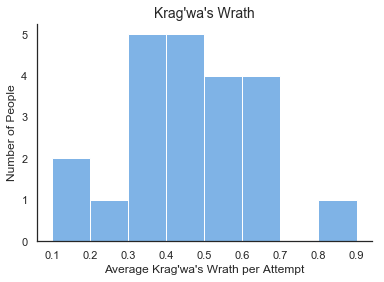

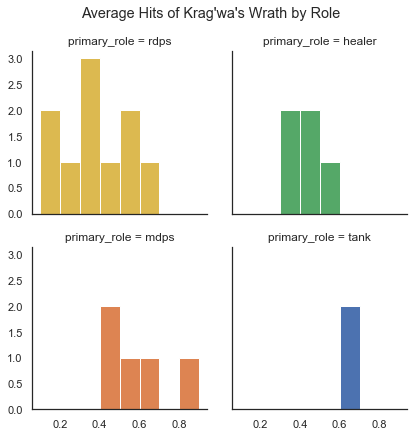

Mean is 0.458660 per attempt.
Median is 0.479475 per attempt.
Max attempts by player is 51.


In [198]:
la.collect_stats(data=frog, master_list=master_list, player_list=player_list, 
                 boss_name='Conclave', boss_id=2268, spell_name='Krag\'wa\'s Wrath', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=20, bins=bins)

<a id='rasta'></a>
## Rastakhan

<a id='r_frog'></a>
### Toad Toxin

Spell ID: 285044

In [200]:
toad_toxin = wl.damage_taken(api_key, master_list, 285044, boss_id=2272, hit_type='tickCount')

Player added: Psychodruid
Player added: Velryssa
Player added: Toyqt
Player added: Caydd
Player added: Irvaeryss
Player added: Shadowbaine
Player added: Petroll
Player added: Jampers
Player added: Brianjr
Player added: Stradivarus
Player added: Valmet
Player added: Ayriea
Player added: Earrl
Player added: Kopyedeep
Player added: Mythroes
Player added: Metönymy
Player added: Acturus
Player added: Mythroes
Player added: Divinance
Player added: Metönymy
Player added: Tawn
Player added: Earrl
Player added: Shadowbaine
Player added: Brianjr
Player added: Illestrae
Player added: Jampers
Player added: Caydd
Player added: Valmet
Player added: Stradivarus
Player added: Elzam
Player added: Petroll
Player added: Tahvee
Player added: Psychodruid
Player added: Ultray
Player added: Metönymy
Player added: Earrl
Player added: Shadowbaine
Player added: Acturus
Player added: Psychodruid
Player added: Ayriea
Player added: Caydd
Player added: Kopyedeep
Player added: Petroll
Player added: Elzam
Player adde

In [203]:
bins = np.arange(0.5, 6, 0.5)

         player   hits  damage_taken  fight_count primary_role  av_count
15     Metönymy   45.0     1478908.0           67         rdps  0.671642
24         Tawn   54.0     1937945.0           49         rdps  1.102041
20        Soome   36.0     1083266.0           18         rdps  2.000000
13       Kohbee   94.0     3460934.0           47         rdps  2.000000
5     Divinance  156.0     4945511.0           67         tank  2.328358
12      Jampers  159.0     4891805.0           67       healer  2.373134
21  Stradivarus   79.0     2773530.0           33         rdps  2.393939
14    Kopyedeep  122.0     3676913.0           49         rdps  2.489796
7         Elzam  153.0     5011727.0           59         mdps  2.593220
3       Brianjr  174.0     5982732.0           67         mdps  2.597015
19  Shadowbaine  144.0     4664990.0           52         rdps  2.769231
27       Valmet  191.0     5190403.0           67         mdps  2.850746
18  Psychodruid  191.0     6355493.0           67  

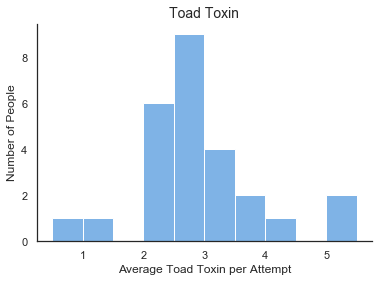

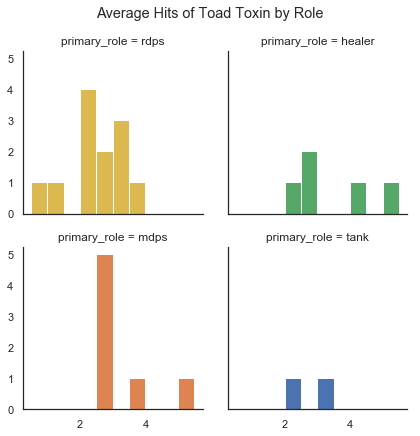

Mean is 2.910845 per attempt.
Median is 2.858209 per attempt.
Max attempts by player is 67.


In [204]:
la.collect_stats(data=toad_toxin, master_list=master_list, player_list=player_list, 
                 boss_name='Conclave', boss_id=2272, spell_name='Toad Toxin', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=1, bins=bins)

<a id='leap'></a>
### Meteor Leap

Spell ID: 284688

In [205]:
meteor_leap = wl.damage_taken(api_key, master_list, 284688, boss_id=2272, hit_type='hitCount')

Player added: Mythroes
Player added: Caydd
Player added: Shadowbaine
Player added: Jampers
Player added: Kohbee
Player added: Irvaeryss
Player added: Psychodruid
Player added: Ultray
Player added: Kopyedeep
Player added: Ayriea
Player added: Acturus
Player added: Toyqt
Player added: Metönymy
Player added: Earrl
Player added: Valmet
Player added: Mythroes
Player added: Ayriea
Player added: Caydd
Player added: Psychodruid
Player added: Acturus
Player added: Irvaeryss
Player added: Brianjr
Player added: Jampers
Player added: Shadowbaine
Player added: Metönymy
Player added: Ultray
Player added: Tawn
Player added: Stradivarus
Player added: Illestrae
Player added: Petroll
Player added: Elzam
Player added: Tahvee
Player added: Jampers
Player added: Ayriea
Player added: Shadowbaine
Player added: Brianjr
Player added: Soome
Player added: Kohbee
Player added: Petroll
Player added: Illestrae
Player added: Valmet
Player added: Irvaeryss
Player added: Mythroes
Player added: Acturus
Player added: Ta

In [210]:
bins = np.arange(0, 1, 0.1)

         player  hits  damage_taken  fight_count primary_role  av_count
10    Illestrae  45.0     8508797.0           56       healer  0.803571
24         Tawn  39.0     5939571.0           49         rdps  0.795918
23       Tahvee  39.0     5741863.0           49         rdps  0.795918
4         Caydd  52.0     3858860.0           67       healer  0.776119
18  Psychodruid  51.0     7173727.0           67         rdps  0.761194
12      Jampers  50.0     7455912.0           67       healer  0.746269
19  Shadowbaine  36.0     5619447.0           52         rdps  0.692308
26       Ultray  27.0     4115876.0           39         rdps  0.692308
2        Ayriea  39.0     5846721.0           57         rdps  0.684211
16     Mythroes  27.0     6570075.0           40       healer  0.675000
13       Kohbee  31.0     4925347.0           47         rdps  0.659574
17      Petroll  44.0     6887791.0           67         rdps  0.656716
14    Kopyedeep  31.0     4641097.0           49         rdps  0

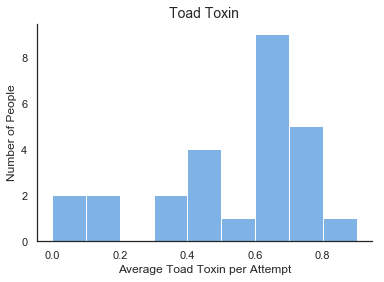

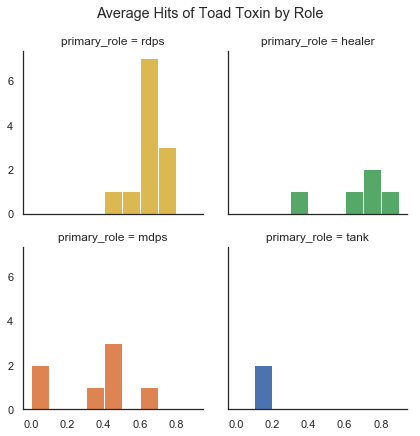

Mean is 0.537868 per attempt.
Median is 0.622297 per attempt.
Max attempts by player is 67.


In [211]:
la.collect_stats(data=meteor_leap, master_list=master_list, player_list=player_list, 
                 boss_name='Rastakhan', boss_id=2272, spell_name='Toad Toxin', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=1, least=False, bins=bins)

<a id='fire'></a>
### Plague of Fire

Spell ID: 285349

In [212]:
plague_fire = wl.damage_taken(api_key, master_list, 285349, boss_id=2272, hit_type='hitCount')

Player added: Ultray
Player added: Irvaeryss
Player added: Stradivarus
Player added: Caydd
Player added: Shadowbaine
Player added: Valmet
Player added: Acturus
Player added: Metönymy
Player added: Jampers
Player added: Toyqt
Player added: Brianjr
Player added: Divinance
Player added: Kohbee
Player added: Velryssa
Player added: Psychodruid
Player added: Earrl
Player added: Ayriea
Player added: Kopyedeep
Player added: Petroll
Player added: Mythroes
Player added: Irvaeryss
Player added: Caydd
Player added: Acturus
Player added: Jampers
Player added: Tawn
Player added: Metönymy
Player added: Mythroes
Player added: Elzam
Player added: Illestrae
Player added: Brianjr
Player added: Valmet
Player added: Petroll
Player added: Divinance
Player added: Petroll
Player added: Metönymy
Player added: Kohbee
Player added: Acturus
Player added: Tawn
Player added: Shadowbaine
Player added: Atalya
Player added: Brianjr
Player added: Mythroes
Player added: Elzam
Player added: Ayriea
Player added: Psychodru

In [215]:
bins = np.arange(0.5, 4, 0.5)

         player   hits  damage_taken  fight_count primary_role  av_count
26       Ultray   25.0     1221660.0           39         rdps  0.641026
24         Tawn   41.0     1988687.0           49         rdps  0.836735
6         Earrl   64.0     2499490.0           67         tank  0.955224
18  Psychodruid   72.0     3464404.0           67         rdps  1.074627
19  Shadowbaine   58.0     2889381.0           52         rdps  1.115385
23       Tahvee   55.0     2749279.0           49         rdps  1.122449
21  Stradivarus   38.0     1861143.0           33         rdps  1.151515
15     Metönymy   84.0     4093240.0           67         rdps  1.253731
2        Ayriea   77.0     3730358.0           57         rdps  1.350877
7         Elzam   81.0     3966392.0           59         mdps  1.372881
17      Petroll   93.0     4566015.0           67         rdps  1.388060
5     Divinance   93.0     3248883.0           67         tank  1.388060
20        Soome   26.0     1271267.0           18  

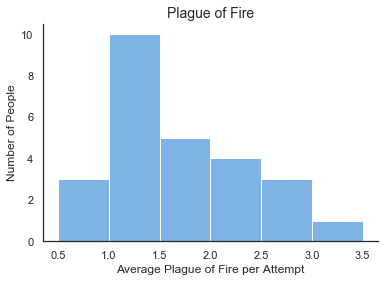

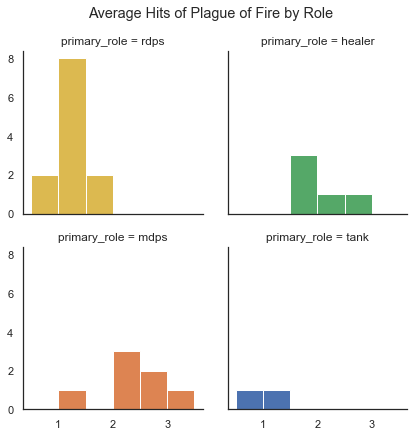

Mean is 1.650398 per attempt.
Median is 1.477324 per attempt.
Max attempts by player is 67.


In [216]:
la.collect_stats(data=plague_fire, master_list=master_list, player_list=player_list, 
                 boss_name='Rastakhan', boss_id=2272, spell_name='Plague of Fire', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=1, bins=bins)

<a id='orbs'></a>
### Dread Reaping (Orbs)

Spell ID: 287147

In [219]:
dread_reaping = wl.damage_taken(api_key, master_list, 287147, boss_id=2272, hit_type='tickCount')

Player added: Psychodruid
Player added: Shadowbaine
Player added: Mythroes
Player added: Petroll
Player added: Kohbee
Player added: Stradivarus
Player added: Ayriea
Player added: Metönymy
Player added: Ultray
Player added: Earrl
Player added: Mythroes
Player added: Elzam
Player added: Tawn
Player added: Shadowbaine
Player added: Jampers
Player added: Divinance
Player added: Brianjr
Player added: Ayriea
Player added: Petroll
Player added: Atalya
Player added: Irvaeryss
Player added: Kopyedeep
Player added: Illestrae
Player added: Caydd
Player added: Kohbee
Player added: Acturus
Player added: Soome
Player added: Valmet
Player added: Psychodruid
Player added: Metönymy
Player added: Divinance
Player added: Psychodruid
Player added: Soome
Player added: Atalya
Player added: Brianjr
Player added: Acturus
Player added: Valmet
Player added: Shadowbaine
Player added: Ayriea
Player added: Jampers
Player added: Tahvee
Player added: Irvaeryss
Player added: Kohbee
Player added: Petroll
Player added:

In [224]:
bins = np.arange(0.5, 2.8, 0.25)

         player   hits  damage_taken  fight_count primary_role  av_count
4         Caydd   29.0     1879786.0           67       healer  0.432836
26       Ultray   18.0     1216863.0           39         rdps  0.461538
28     Velryssa   12.0      805726.0           18         mdps  0.666667
12      Jampers   45.0     2965738.0           67       healer  0.671642
7         Elzam   43.0     2859860.0           59         mdps  0.728814
16     Mythroes   33.0     2214042.0           40       healer  0.825000
11    Irvaeryss   40.0     2323683.0           48         mdps  0.833333
0       Acturus   56.0     3412450.0           67       healer  0.835821
23       Tahvee   42.0     2941275.0           49         rdps  0.857143
6         Earrl   59.0     3248525.0           67         tank  0.880597
21  Stradivarus   30.0     1902538.0           33         rdps  0.909091
14    Kopyedeep   47.0     3130282.0           49         rdps  0.959184
2        Ayriea   56.0     3808965.0           57  

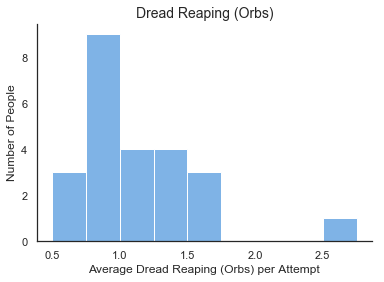

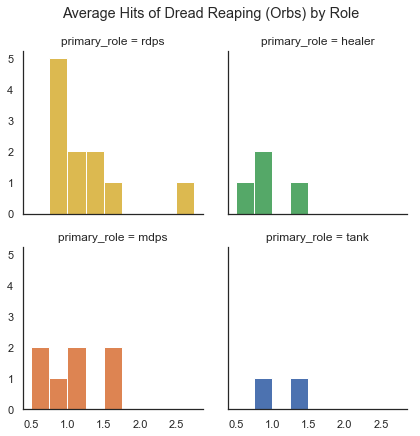

Mean is 1.097065 per attempt.
Median is 0.983765 per attempt.
Max attempts by player is 67.


In [225]:
la.collect_stats(data=dread_reaping, master_list=master_list, player_list=player_list, 
                 boss_name='Rastakhan', boss_id=2272, spell_name='Dread Reaping (Orbs)', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=1, bins=bins)

<a id='mekka'></a>
## Mekkatorque

<a id='m_cc'></a>
### Roots/Snares/Stuns/Grips

- Mage: Frost Nova (122)
- Druid: Solar Beam (78675), Typhoon (61391), Entangling Roots (339), Mass Entanglement (102359), Skull Bash (106839)
- Warrior: Hamstring (1715), Piercing Howl (12323), Intimidating Shout (5246)
- Hunter: Freezing Trap (187650), Tar Trap (187698), Wyvern Sting (19386)
- DK: Death Grip (49576), Gorefiend's Grasp (108199)
- Shaman: Lightning/Cap Totem (192058)
- Paladin: Rebuke (96231), Hammer of Justice (853)
- Monk: Spear Hand Strike (116705), Leg Sweep (119381)
- Priest: Holy Word: Chastise (88625)

In [226]:
cc_ids = [122, 78675, 61391, 339, 102359, 106839, 1715, 12323, 5246, 187650, 
          187698, 19386, 49576, 108199, 192058, 96231, 853, 116705, 119381,
          88625]

mekka_cc = pd.DataFrame([], columns=['log_id', 'spell_id', 'player', 'count'])

for spell_id in cc_ids:
    try:
        print('Spell Id:', spell_id)
        spell_df = wl.cast_count(api_key, master_list, spell_id, boss_id=2276)
        mekka_cc = pd.concat([mekka_cc, spell_df])
    except:
        continue

Spell Id: 122
Player added: Tawn
Player added: Metönymy
Player added: Tawn
Player added: Tawn
Player added: Metönymy
Player added: Metönymy
Player added: Tawn
Player added: Tawn
Player added: Metönymy
Player added: Metönymy
Player added: Tawn
Spell Id: 78675
Spell Id: 61391
Player added: Soome
Player added: Soome
Spell Id: 339
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Soome
Player added: Soome
Player added: Psychodruid
Player added: Earrl
Player added: Psychodruid
Player added: Jampers
Player added: Earrl
Player added: Soome
Player added: Psychodruid
Player added: Psychodruid
Player added: Jampers
Player added: Earrl
Player added: Psychodruid
Player added: Psychodruid
Spell Id: 102359
Player added: Psychodruid
Player added: Earrl
Player added: Soome
Player added: Jampers
Player added: Earrl
Player added: Psychodruid
Player added: Soome
Player added: Earrl
Player added: Soome
Player added: Psychodruid
Player added: Soome
Player added: Psychodr

Player added: Divanance
Player added: Divanance
Player added: Divanance
Player added: Divanance
Player added: Divanance
Player added: Stradk
Player added: Divanance
Spell Id: 192058
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Player added: Illestrae
Spell Id: 96231
Spell Id: 853
Player added: Toyqt
Player added: Toyqt
Player added: Acturus
Player added: Toyqt
Player added: Toyqt
Player added: Toyqt
Player added: Toyqt
Player added: Toyqt
Player added: Acturus
Player added: Toyqt
Player added: Toyqt
Player added: Toyqt
Spell Id: 116705
Spell Id: 119381
Player added: Caydd
Player added: Caydd
Spell Id: 88625


In [229]:
bins = np.arange(0, 8, 1)

         player  count  fight_count primary_role  av_count
5     Divinance  889.0          134         tank  6.634328
18  Psychodruid  608.0          107         rdps  5.682243
6         Earrl  381.0          134         tank  2.843284
20        Soome  113.0           62         rdps  1.822581
25        Toyqt  211.0          134         mdps  1.574627
1        Atalya   43.0           34         mdps  1.264706
12      Jampers  129.0          129       healer  1.000000
24         Tawn   58.0           91         rdps  0.637363
10    Illestrae   28.0          134       healer  0.208955
15     Metönymy   11.0          134         rdps  0.082090
13       Kohbee    2.0          128         rdps  0.015625
4         Caydd    2.0          134       healer  0.014925
0       Acturus    2.0          134       healer  0.014925
7         Elzam    1.0          107         mdps  0.009346
26       Ultray    0.0            6         rdps  0.000000
27       Valmet    0.0          128         mdps  0.0000

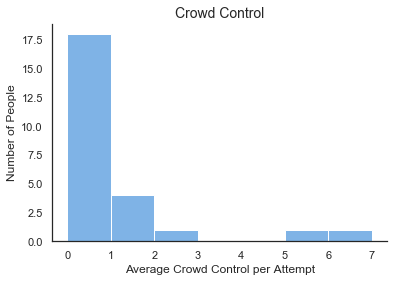

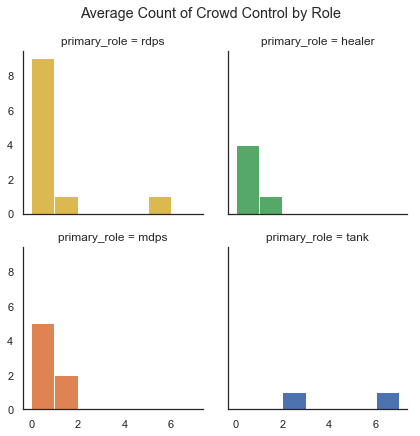

Mean is 0.872200 per attempt.
Median is 0.014925 per attempt.
Max attempts by player is 134.


In [230]:
la.collect_stats(data=mekka_cc, master_list=master_list, player_list=player_list, 
                 boss_name='Mekkatorque', boss_id=2276, spell_name='Crowd Control', 
                 analysis_columns=['count'], min_attempts=1, least=False, bins=bins)

<a id='cannon'></a>
### Buster Cannon

Spell ID: 282182

In [231]:
buster_cannon = wl.damage_taken(api_key, master_list, 282182, boss_id=2276, hit_type='hitCount')

Player added: Illestrae
Player added: Acturus
Player added: Toyqt
Player added: Valmet
Player added: Soome
Player added: Shadowbaine
Player added: Velryssa
Player added: Tahvee
Player added: Petroll
Player added: Earrl
Player added: Atalya
Player added: Soome
Player added: Acturus
Player added: Brianjr
Player added: Ayriea
Player added: Tawn
Player added: Valmet
Player added: Elzam
Player added: Velryssa
Player added: Metönymy
Player added: Illestrae
Player added: Kopyedeep
Player added: Caydd
Player added: Earrl
Player added: Toyqt
Player added: Divanance
Player added: Psychodruid
Player added: Jampers
Player added: Jampers
Player added: Illestrae
Player added: Brianjr
Player added: Earrl
Player added: Shadowbaine
Player added: Velryssa
Player added: Psychodruid
Player added: Metönymy
Player added: Soome
Player added: Valmet
Player added: Atalya
Player added: Brianjr
Player added: Tawn
Player added: Metönymy
Player added: Kohbee
Player added: Kopyedeep
Player added: Earrl
Player added

In [239]:
bins = np.arange(0.05, 0.35, 0.05)

         player  hits  damage_taken  fight_count primary_role  av_count
2        Ayriea   6.0     2123739.0          119         rdps  0.050420
28     Velryssa   3.0      765114.0           48         mdps  0.062500
13       Kohbee   8.0     2486848.0          128         rdps  0.062500
1        Atalya   3.0     1107761.0           34         mdps  0.088235
17      Petroll  12.0     3251436.0          134         rdps  0.089552
20        Soome   6.0     1705837.0           62         rdps  0.096774
16     Mythroes  17.0     4752624.0          134       healer  0.126866
23       Tahvee   8.0     3137041.0           63         rdps  0.126984
3       Brianjr  18.0     5761666.0          134         mdps  0.134328
25        Toyqt  19.0     5781300.0          134         mdps  0.141791
4         Caydd  20.0     5377777.0          134       healer  0.149254
27       Valmet  20.0     6451102.0          128         mdps  0.156250
11    Irvaeryss  11.0     3343894.0           69         mdps  0

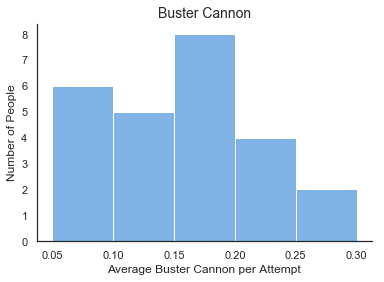

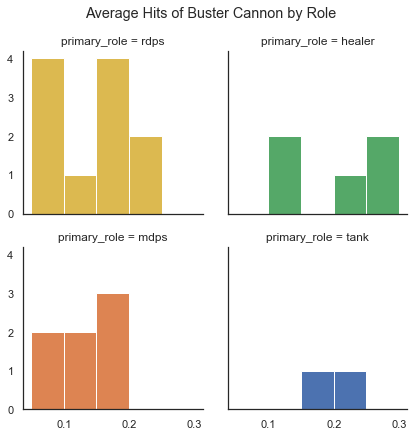

Mean is 0.159370 per attempt.
Median is 0.159420 per attempt.
Max attempts by player is 134.


In [240]:
la.collect_stats(data=buster_cannon, master_list=master_list, player_list=player_list, 
                 boss_name='Mekkatorque', boss_id=2276, spell_name='Buster Cannon', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=1, bins=bins)

<a id='sheep'></a>
### Sheep Shrapnel

Spell ID: 287891

In [241]:
sheep_shrapnel = wl.damage_taken(api_key, master_list, 287891, boss_id=2276, hit_type='hitCount')

Player added: Velryssa
Player added: Soome
Player added: Metönymy
Player added: Brianjr
Player added: Caydd
Player added: Ayriea
Player added: Irvaeryss
Player added: Tahvee
Player added: Illestrae
Player added: Psychodruid
Player added: Mythroes
Player added: Valmet
Player added: Divanance
Player added: Earrl
Player added: Atalya
Player added: Toyqt
Player added: Acturus
Player added: Petroll
Player added: Kohbee
Player added: Shadowbaine
Player added: Brianjr
Player added: Earrl
Player added: Petroll
Player added: Velryssa
Player added: Illestrae
Player added: Valmet
Player added: Tawn
Player added: Psychodruid
Player added: Mythroes
Player added: Kohbee
Player added: Kopyedeep
Player added: Metönymy
Player added: Ayriea
Player added: Soome
Player added: Acturus
Player added: Jampers
Player added: Caydd
Player added: Elzam
Player added: Divanance
Player added: Toyqt
Player added: Mythroes
Player added: Soome
Player added: Tahvee
Player added: Acturus
Player added: Jampers
Player adde

In [244]:
bins = np.arange(0, 0.7, 0.1)

         player  hits  damage_taken  fight_count primary_role  av_count
19  Shadowbaine   5.0     1106275.0           73         rdps  0.068493
2        Ayriea  14.0     2723773.0          119         rdps  0.117647
23       Tahvee  10.0     2032340.0           63         rdps  0.158730
11    Irvaeryss  11.0     1821059.0           69         mdps  0.159420
7         Elzam  18.0     2827602.0          107         mdps  0.168224
15     Metönymy  23.0     2167217.0          134         rdps  0.171642
17      Petroll  27.0     4843213.0          134         rdps  0.201493
14    Kopyedeep  22.0     3828774.0          104         rdps  0.211538
3       Brianjr  29.0     4582038.0          134         mdps  0.216418
27       Valmet  30.0     4414522.0          128         mdps  0.234375
28     Velryssa  16.0     3263617.0           48         mdps  0.333333
0       Acturus  45.0     7418196.0          134       healer  0.335821
18  Psychodruid  36.0     7353278.0          107         rdps  0

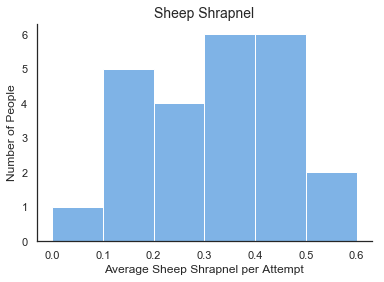

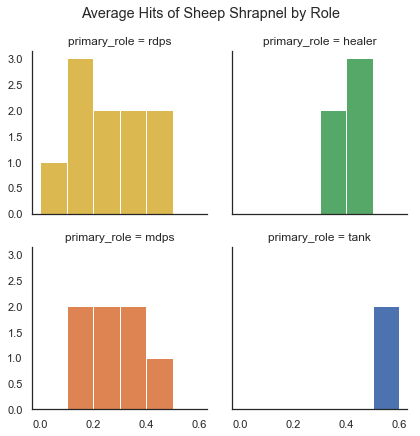

Mean is 0.315431 per attempt.
Median is 0.336135 per attempt.
Max attempts by player is 134.


In [245]:
la.collect_stats(data=sheep_shrapnel, master_list=master_list, player_list=player_list, 
                 boss_name='Mekkatorque', boss_id=2276, spell_name='Sheep Shrapnel', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=30, bins=bins)

<a id='robot'></a>
### Robot Managment

Tampering. Spell ID: 286105

In [246]:
tampering = wl.buff_duration(api_key, master_list, 286105, boss_id=2276, buff=False)

Player added: Divanance
Player added: Tahvee
Player added: Shadowbaine
Player added: Earrl
Player added: Irvaeryss
Player added: Ayriea
Player added: Psychodruid
Player added: Metönymy
Player added: Velryssa
Player added: Kohbee
Player added: Valmet
Player added: Brianjr
Player added: Petroll
Player added: Toyqt
Player added: Earrl
Player added: Soome
Player added: Elzam
Player added: Toyqt
Player added: Psychodruid
Player added: Tawn
Player added: Metönymy
Player added: Divanance
Player added: Ayriea
Player added: Valmet
Player added: Brianjr
Player added: Petroll
Player added: Kopyedeep
Player added: Kohbee
Player added: Velryssa
Player added: Brianjr
Player added: Soome
Player added: Toyqt
Player added: Earrl
Player added: Petroll
Player added: Psychodruid
Player added: Tahvee
Player added: Mythroes
Player added: Shadowbaine
Player added: Velryssa
Player added: Valmet
Player added: Irvaeryss
Player added: Divanance
Player added: Illestrae
Player added: Toyqt
Player added: Brianjr
Pl

In [249]:
bins = np.arange(0, 1, 0.1)

         player   uses  fight_count primary_role  av_count
5     Divinance  112.0          134         tank  0.835821
6         Earrl   96.0          134         tank  0.716418
15     Metönymy   74.0          134         rdps  0.552239
3       Brianjr   71.0          134         mdps  0.529851
20        Soome   32.0           62         rdps  0.516129
2        Ayriea   53.0          119         rdps  0.445378
25        Toyqt   58.0          134         mdps  0.432836
18  Psychodruid   46.0          107         rdps  0.429907
11    Irvaeryss   28.0           69         mdps  0.405797
13       Kohbee   50.0          128         rdps  0.390625
24         Tawn   32.0           91         rdps  0.351648
27       Valmet   45.0          128         mdps  0.351562
14    Kopyedeep   36.0          104         rdps  0.346154
19  Shadowbaine   25.0           73         rdps  0.342466
17      Petroll   42.0          134         rdps  0.313433
28     Velryssa   15.0           48         mdps  0.3125

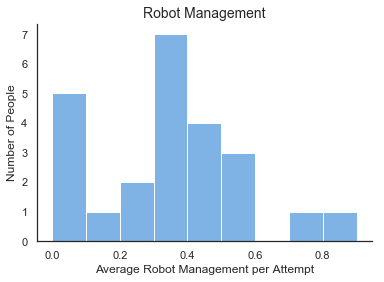

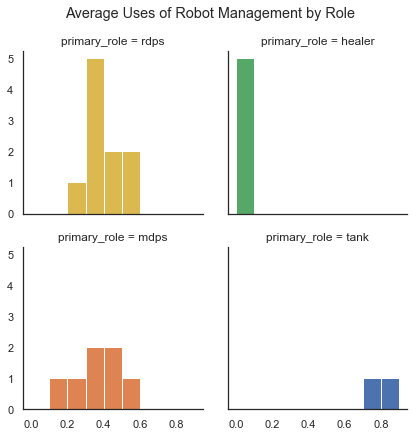

Mean is 0.328969 per attempt.
Median is 0.348858 per attempt.
Max attempts by player is 134.


In [250]:
la.collect_stats(data=tampering, master_list=master_list, player_list=player_list, 
                 boss_name='Mekkatorque', boss_id=2276, spell_name='Robot Management', 
                 analysis_columns=['uses'], min_attempts=30, least=False, bins=bins)

<a id='stormwall'></a>
## Stormwall Blockade

<a id='seaswell'></a>
### Sea Swell
Spell ID: 285125

In [251]:
sea_swell = wl.damage_taken(api_key, master_list, 285125, boss_id=2280, hit_type='hitCount')

Player added: Psychodruid
Player added: Brianjr
Player added: Shadowbaine
Player added: Ayriea
Player added: Mythroes
Player added: Illestrae
Player added: Mythroes
Player added: Metönymy
Player added: Valmet
Player added: Jampers
Player added: Caydd
Player added: Earrl
Player added: Psychodruid
Player added: Soome
Player added: Brianjr
Player added: Velryssa
Player added: Kohbee
Player added: Toyqt
Player added: Petroll
Player added: Shadowbaine
Player added: Ayriea
Player added: Kopyedeep
Player added: Tawn
Player added: Tahvee
Player added: Divinance
Player added: Shadowbaine
Player added: Brianjr
Player added: Psychodruid
Player added: Ayriea
Player added: Mythroes
Player added: Brianjr
Player added: Mythroes
Player added: Shadowbaine
Player added: Psychodruid
Player added: Ayriea
Player added: Toyqt
Player added: Caydd
Player added: Valmet
Player added: Tahvee
Player added: Brianjr
Player added: Velryssa
Player added: Metönymy
Player added: Illestrae
Player added: Acturus
Player a

In [257]:
bins = np.arange(0.025, 0.25, 0.025)

         player  hits  damage_taken  fight_count primary_role  av_count
4         Caydd   4.0      348106.0          147       healer  0.027211
28     Velryssa   9.0     1048760.0          205         mdps  0.043902
11    Irvaeryss   7.0      636830.0          150         mdps  0.046667
13       Kohbee  10.0     1099644.0          205         rdps  0.048780
27       Valmet  11.0     1019871.0          205         mdps  0.053659
17      Petroll  12.0     1363728.0          205         rdps  0.058537
14    Kopyedeep  13.0     1547433.0          205         rdps  0.063415
15     Metönymy  18.0     1943745.0          205         rdps  0.087805
0       Acturus  16.0     1692221.0          174       healer  0.091954
20        Soome  21.0     2224511.0          205         rdps  0.102439
10    Illestrae  22.0     2118323.0          205       healer  0.107317
24         Tawn  23.0     2504276.0          205         rdps  0.112195
3       Brianjr  24.0     2823180.0          205         mdps  0

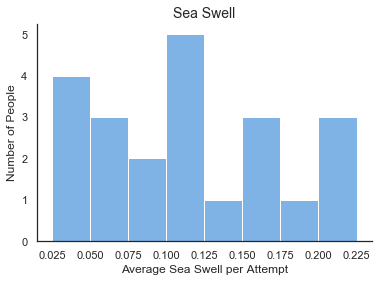

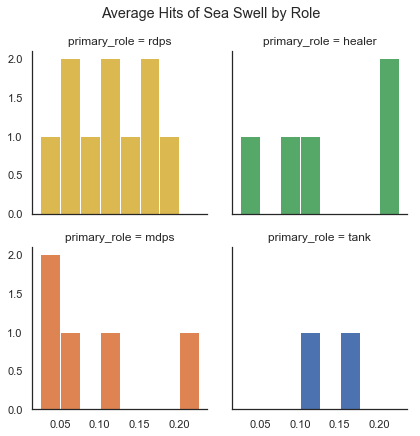

Mean is 0.114039 per attempt.
Median is 0.109756 per attempt.
Max attempts by player is 205.


In [258]:
la.collect_stats(data=sea_swell, master_list=master_list, player_list=player_list, 
                 boss_name='Stormwall', boss_id=2280, spell_name='Sea Swell', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=1, bins=bins)

<a id='volley'></a>
### Jolting Volley (Lightning)

Spell ID: 287169

In [259]:
jolting_volley = wl.damage_taken(api_key, master_list, 287169, boss_id=2280, hit_type='hitCount')

Player added: Divinance
Player added: Kopyedeep
Player added: Irvaeryss
Player added: Kohbee
Player added: Metönymy
Player added: Petroll
Player added: Shadowbaine
Player added: Earrl
Player added: Illestrae
Player added: Mythroes
Player added: Psychodruid
Player added: Acturus
Player added: Tahvee
Player added: Soome
Player added: Toyqt
Player added: Tawn
Player added: Caydd
Player added: Ayriea
Player added: Valmet
Player added: Jampers
Player added: Brianjr
Player added: Velryssa
Player added: Jampers
Player added: Divinance
Player added: Mythroes
Player added: Kopyedeep
Player added: Ayriea
Player added: Illestrae
Player added: Soome
Player added: Petroll
Player added: Toyqt
Player added: Tawn
Player added: Valmet
Player added: Earrl
Player added: Metönymy
Player added: Shadowbaine
Player added: Velryssa
Player added: Brianjr
Player added: Kohbee
Player added: Tahvee
Player added: Psychodruid
Player added: Caydd
Player added: Acturus
Player added: Kopyedeep
Player added: Illestrae


In [262]:
bins = np.arange(6, 16, 1)

         player    hits  damage_taken  fight_count primary_role   av_count
11    Irvaeryss   904.0    38436356.0          150         mdps   6.026667
28     Velryssa  1314.0    60181751.0          205         mdps   6.409756
20        Soome  1363.0    63288061.0          205         rdps   6.648780
13       Kohbee  1372.0    64407284.0          205         rdps   6.692683
25        Toyqt   702.0    26903252.0          103         mdps   6.815534
16     Mythroes  1514.0    70929708.0          205       healer   7.385366
2        Ayriea  1412.0    66715086.0          191         rdps   7.392670
5     Divinance  1521.0    47057762.0          205         tank   7.419512
4         Caydd  1144.0    50559681.0          147       healer   7.782313
3       Brianjr  1868.0    88767854.0          205         mdps   9.112195
12      Jampers   881.0    36439604.0           89       healer   9.898876
23       Tahvee  1717.0    83559299.0          171         rdps  10.040936
19  Shadowbaine  2300.0  

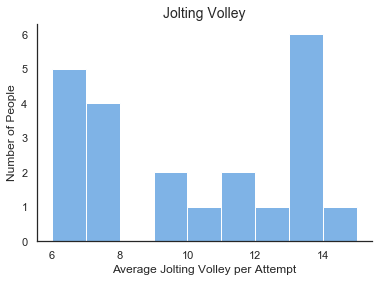

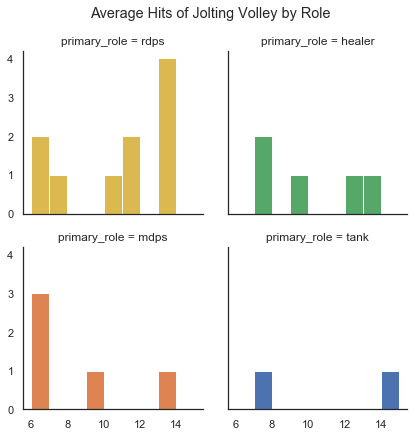

Mean is 10.169381 per attempt.
Median is 9.969906 per attempt.
Max attempts by player is 205.


In [264]:
la.collect_stats(data=jolting_volley, master_list=master_list, player_list=player_list, 
                 boss_name='Stormwall', boss_id=2280, spell_name='Jolting Volley', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=1, bins=bins)

<a id='seastorm'></a>
### Sea Storm

Spell ID: 284365

In [265]:
sea_storm = wl.damage_taken(api_key, master_list, 284365, boss_id=2280, hit_type='hitCount')

Player added: Ayriea
Player added: Toyqt
Player added: Valmet
Player added: Earrl
Player added: Illestrae
Player added: Soome
Player added: Tawn
Player added: Divinance
Player added: Brianjr
Player added: Petroll
Player added: Kohbee
Player added: Acturus
Player added: Caydd
Player added: Velryssa
Player added: Mythroes
Player added: Metönymy
Player added: Jampers
Player added: Tahvee
Player added: Kopyedeep
Player added: Irvaeryss
Player added: Psychodruid
Player added: Shadowbaine
Player added: Shadowbaine
Player added: Caydd
Player added: Psychodruid
Player added: Toyqt
Player added: Velryssa
Player added: Petroll
Player added: Kohbee
Player added: Metönymy
Player added: Soome
Player added: Divinance
Player added: Earrl
Player added: Kopyedeep
Player added: Brianjr
Player added: Illestrae
Player added: Valmet
Player added: Mythroes
Player added: Tawn
Player added: Ayriea
Player added: Tahvee
Player added: Jampers
Player added: Shadowbaine
Player added: Psychodruid
Player added: Ille

In [268]:
bins = np.arange(0.25, 2.75, 0.25)

         player   hits  damage_taken  fight_count primary_role  av_count
6         Earrl   57.0     2392117.0          205         tank  0.278049
5     Divinance   63.0     2468940.0          205         tank  0.307317
0       Acturus  149.0     8445843.0          174       healer  0.856322
18  Psychodruid  186.0    10764180.0          205         rdps  0.907317
14    Kopyedeep  191.0    11026023.0          205         rdps  0.931707
17      Petroll  218.0    12926209.0          205         rdps  1.063415
15     Metönymy  218.0    12745053.0          205         rdps  1.063415
27       Valmet  259.0    11904295.0          205         mdps  1.263415
24         Tawn  269.0    16123487.0          205         rdps  1.312195
10    Illestrae  271.0    14627660.0          205       healer  1.321951
19  Shadowbaine  286.0    16879099.0          205         rdps  1.395122
3       Brianjr  298.0    18137674.0          205         mdps  1.453659
11    Irvaeryss  247.0    12920096.0          150  

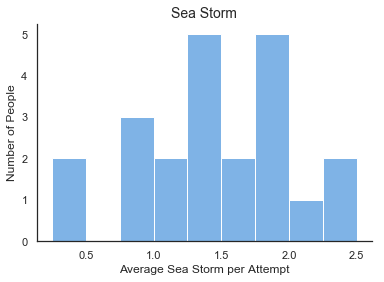

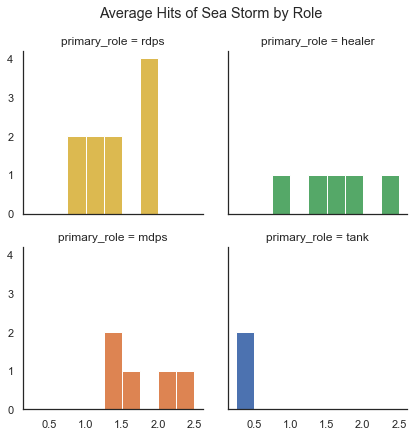

Mean is 1.445183 per attempt.
Median is 1.424390 per attempt.
Max attempts by player is 205.


In [269]:
la.collect_stats(data=sea_storm, master_list=master_list, player_list=player_list, 
                 boss_name='Stormwall', boss_id=2280, spell_name='Sea Storm', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=1, bins=bins)

<a id='jaina'></a>
## Jaina

<a id='barrel'></a>
### Barrel Removal

Spell ID: 285497

In [270]:
barrel = wl.buff_duration(api_key, master_list, 285497, boss_id=2281)

Player added: Jampers
Player added: Soome
Player added: Tawn
Player added: Earrl
Player added: Jampers
Player added: Jampers
Player added: Hokk
Player added: Irvaeryss
Player added: Kohbee
Player added: Earrl
Player added: Caydd
Player added: Soome
Player added: Kopyedeep
Player added: Shadowbaine
Player added: Valmet
Player added: Valmet
Player added: Kopyedeep
Player added: Irvaeryss
Player added: Jampers
Player added: Soome
Player added: Kohbee
Player added: Shadowbaine
Player added: Shadowbaine
Player added: Soome
Player added: Kopyedeep
Player added: Jampers
Player added: Ayriea
Player added: Kopyedeep
Player added: Irvaeryss
Player added: Metönymy
Player added: Brianjr
Player added: Jampers
Player added: Kohbee
Player added: Earrl
Player added: Caydd
Player added: Divinance
Player added: Tahvee
Player added: Tawn
Player added: Psychodruid
Player added: Toyqt
Player added: Soome
Player added: Shadowbaine
Player added: Caydd
Player added: Jampers
Player added: Shadowbaine
Player ad

In [278]:
bins = np.arange(0, 0.9, 0.1)

         player   uses  fight_count primary_role  av_count
20        Soome  296.0          382         rdps  0.774869
12      Jampers  333.0          472       healer  0.705508
14    Kopyedeep  183.0          396         rdps  0.462121
19  Shadowbaine   82.0          392         rdps  0.209184
24         Tawn   17.0          251         rdps  0.067729
27       Valmet   17.0          338         mdps  0.050296
6         Earrl   20.0          472         tank  0.042373
11    Irvaeryss   10.0          423         mdps  0.023641
2        Ayriea    8.0          343         rdps  0.023324
13       Kohbee   10.0          470         rdps  0.021277
23       Tahvee    7.0          347         rdps  0.020173
18  Psychodruid    8.0          415         rdps  0.019277
4         Caydd    4.0          229       healer  0.017467
3       Brianjr    6.0          471         mdps  0.012739
5     Divinance    6.0          472         tank  0.012712
25        Toyqt    4.0          359         mdps  0.0111

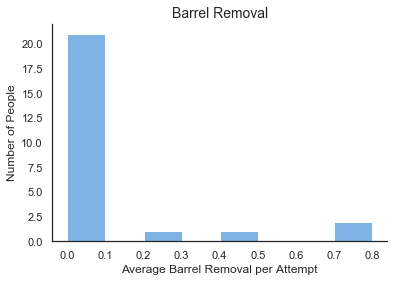

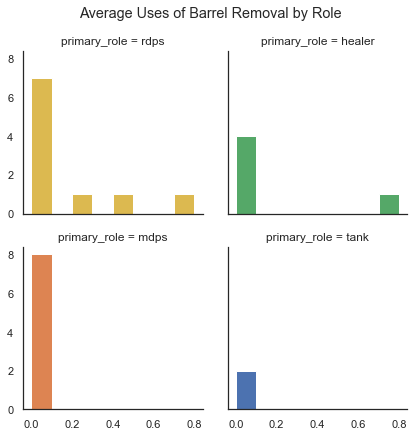

Mean is 0.099247 per attempt.
Median is 0.017467 per attempt.
Max attempts by player is 472.


In [279]:
la.collect_stats(data=barrel, master_list=master_list, player_list=player_list, 
                 boss_name='Jaina', boss_id=2281, spell_name='Barrel Removal', 
                 analysis_columns=['uses'], min_attempts=1, least=False, bins=bins)

<a id='avalanche'></a>
### Avalanche

Spell ID: 287585

In [281]:
avalanche = wl.damage_taken(api_key, master_list, 287585, boss_id=2281, hit_type='hitCount')

Player added: Illestrae
Player added: Brianjr
Player added: Jampers
Player added: Caydd
Player added: Divinance
Player added: Shadowbaine
Player added: Toyqt
Player added: Petroll
Player added: Atalya
Player added: Irvaeryss
Player added: Brianjr
Player added: Atalya
Player added: Shadowbaine
Player added: Elzam
Player added: Jampers
Player added: Earrl
Player added: Kopyedeep
Player added: Soome
Player added: Toyqt
Player added: Caydd
Player added: Divinance
Player added: Ayriea
Player added: Mythroes
Player added: Illestrae
Player added: Tahvee
Player added: Tawn
Player added: Metönymy
Player added: Hokk
Player added: Kohbee
Player added: Irvaeryss
Player added: Irvaeryss
Player added: Kopyedeep
Player added: Acturus
Player added: Tahvee
Player added: Divinance
Player added: Brianjr
Player added: Illestrae
Player added: Hokk
Player added: Caydd
Player added: Kohbee
Player added: Earrl
Player added: Valmet
Player added: Soome
Player added: Shadowbaine
Player added: Tawn
Player added: 

Player added: Divinance
Player added: Ayriea
Player added: Hokk
Player added: Jampers
Player added: Shadowbaine
Player added: Psychodruid
Player added: Valmet
Player added: Soome
Player added: Metönymy
Player added: Earrl
Player added: Tawn
Player added: Kohbee
Player added: Toyqt
Player added: Kopyedeep
Player added: Petroll
Player added: Mythroes
Player added: Acturus
Player added: Brianjr
Player added: Illestrae
Player added: Tahvee
Player added: Irvaeryss
Player added: Jampers
Player added: Kohbee
Player added: Divinance
Player added: Toyqt
Player added: Earrl
Player added: Psychodruid
Player added: Valmet
Player added: Brianjr
Player added: Mythroes
Player added: Tahvee
Player added: Metönymy
Player added: Illestrae
Player added: Kopyedeep
Player added: Petroll
Player added: Acturus
Player added: Shadowbaine
Player added: Ayriea
Player added: Hokk
Player added: Elzam
Player added: Velryssa
Player added: Petroll
Player added: Valmet
Player added: Caydd
Player added: Kohbee
Player a

In [283]:
bins = np.arange(0.4, 0.8, 0.05)

         player    hits  damage_taken  fight_count primary_role  av_count
2        Ayriea   144.0    22684809.0          343         rdps  0.419825
20        Soome   191.0    29452256.0          382         rdps  0.500000
12      Jampers   238.0    37586574.0          472       healer  0.504237
16     Mythroes   241.0    37076745.0          449       healer  0.536748
14    Kopyedeep   213.0    31386573.0          396         rdps  0.537879
15     Metönymy   241.0    36292341.0          446         rdps  0.540359
23       Tahvee   189.0    30121094.0          347         rdps  0.544669
3       Brianjr   260.0    38954130.0          471         mdps  0.552017
13       Kohbee   268.0    42867348.0          470         rdps  0.570213
18  Psychodruid   241.0    36447218.0          415         rdps  0.580723
25        Toyqt   210.0    29675841.0          359         mdps  0.584958
11    Irvaeryss   248.0    32186271.0          423         mdps  0.586288
9          Hokk   205.0    31289351.0 

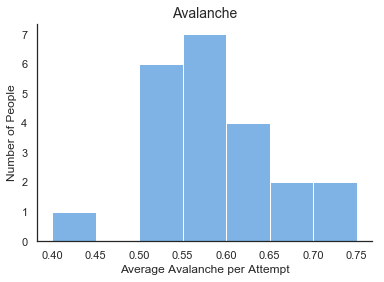

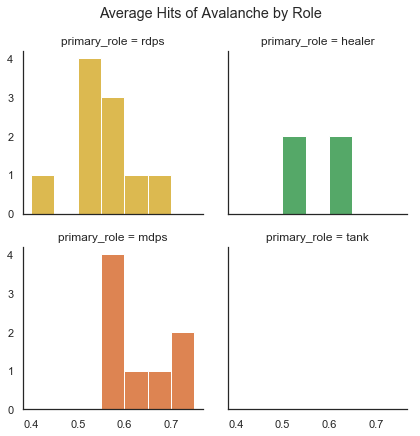

Mean is 0.727356 per attempt.
Median is 0.587393 per attempt.
Max attempts by player is 472.


In [284]:
la.collect_stats(data=avalanche, master_list=master_list, player_list=player_list, 
                 boss_name='Jaina', boss_id=2281, spell_name='Avalanche', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=1, bins=bins)

<a id='pitch'></a>
### Searing Pitch

Spell ID: 287365

In [287]:
searing_pitch = wl.damage_taken(api_key, master_list, 287365, boss_id=2281, hit_type='tickCount')

Player added: Divinance
Player added: Kohbee
Player added: Metönymy
Player added: Soome
Player added: Kopyedeep
Player added: Brianjr
Player added: Valmet
Player added: Shadowbaine
Player added: Toyqt
Player added: Petroll
Player added: Atalya
Player added: Jampers
Player added: Irvaeryss
Player added: Illestrae
Player added: Earrl
Player added: Ayriea
Player added: Caydd
Player added: Elzam
Player added: Hokk
Player added: Jampers
Player added: Shadowbaine
Player added: Irvaeryss
Player added: Kopyedeep
Player added: Caydd
Player added: Elzam
Player added: Earrl
Player added: Divinance
Player added: Toyqt
Player added: Brianjr
Player added: Tahvee
Player added: Tawn
Player added: Soome
Player added: Illestrae
Player added: Metönymy
Player added: Mythroes
Player added: Atalya
Player added: Ayriea
Player added: Kohbee
Player added: Valmet
Player added: Hokk
Player added: Soome
Player added: Shadowbaine
Player added: Psychodruid
Player added: Acturus
Player added: Kopyedeep
Player added:

Player added: Shadowbaine
Player added: Divinance
Player added: Kopyedeep
Player added: Acturus
Player added: Ayriea
Player added: Kohbee
Player added: Soome
Player added: Earrl
Player added: Valmet
Player added: Psychodruid
Player added: Jampers
Player added: Toyqt
Player added: Tawn
Player added: Hokk
Player added: Tahvee
Player added: Brianjr
Player added: Mythroes
Player added: Metönymy
Player added: Petroll
Player added: Illestrae
Player added: Illestrae
Player added: Irvaeryss
Player added: Metönymy
Player added: Acturus
Player added: Psychodruid
Player added: Mythroes
Player added: Kopyedeep
Player added: Toyqt
Player added: Jampers
Player added: Earrl
Player added: Shadowbaine
Player added: Ayriea
Player added: Hokk
Player added: Divinance
Player added: Tahvee
Player added: Kohbee
Player added: Valmet
Player added: Brianjr
Player added: Petroll
Player added: Elzam
Player added: Kohbee
Player added: Metönymy
Player added: Kopyedeep
Player added: Mythroes
Player added: Petroll
Pl

In [289]:
bins = np.arange(1, 7.5, 0.5)

         player    hits  damage_taken  fight_count primary_role  av_count
1        Atalya   486.0    37536442.0          338         mdps  1.437870
9          Hokk   715.0    54867335.0          349         mdps  2.048711
3       Brianjr  1207.0    80857726.0          471         mdps  2.562633
4         Caydd   643.0    31690448.0          229       healer  2.807860
18  Psychodruid  1191.0    80874116.0          415         rdps  2.869880
16     Mythroes  1294.0    90247632.0          449       healer  2.881960
7         Elzam   797.0    50381006.0          275         mdps  2.898182
19  Shadowbaine  1222.0    90261368.0          392         rdps  3.117347
15     Metönymy  1416.0    94324267.0          446         rdps  3.174888
11    Irvaeryss  1428.0    90009354.0          423         mdps  3.375887
2        Ayriea  1164.0    80297854.0          343         rdps  3.393586
23       Tahvee  1274.0    90397870.0          347         rdps  3.671470
28     Velryssa   667.0    40457683.0 

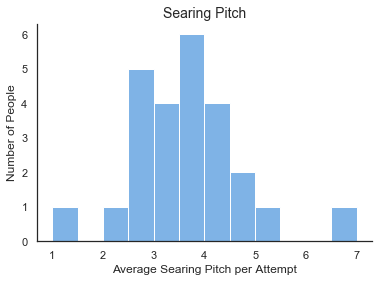

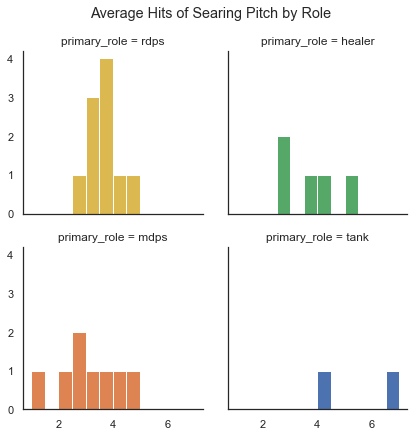

Mean is 3.680525 per attempt.
Median is 3.726257 per attempt.
Max attempts by player is 472.


In [290]:
la.collect_stats(data=searing_pitch, master_list=master_list, player_list=player_list, 
                 boss_name='Jaina', boss_id=2281, spell_name='Searing Pitch', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=1, bins=bins)

<a id='block'></a>
### Frozen Solid (Ice Blocks)

Spell ID: 287490

In [291]:
frozen_solid = wl.buff_duration(api_key, master_list, 287490, boss_id=2281, buff=False)

Player added: Atalya
Player added: Caydd
Player added: Elzam
Player added: Valmet
Player added: Irvaeryss
Player added: Hokk
Player added: Mythroes
Player added: Petroll
Player added: Ayriea
Player added: Earrl
Player added: Shadowbaine
Player added: Divinance
Player added: Irvaeryss
Player added: Shadowbaine
Player added: Jampers
Player added: Metönymy
Player added: Divinance
Player added: Tawn
Player added: Kopyedeep
Player added: Soome
Player added: Elzam
Player added: Ayriea
Player added: Illestrae
Player added: Toyqt
Player added: Kohbee
Player added: Tahvee
Player added: Atalya
Player added: Caydd
Player added: Hokk
Player added: Valmet
Player added: Brianjr
Player added: Mythroes
Player added: Earrl
Player added: Metönymy
Player added: Elzam
Player added: Illestrae
Player added: Psychodruid
Player added: Shadowbaine
Player added: Kopyedeep
Player added: Jampers
Player added: Hokk
Player added: Acturus
Player added: Petroll
Player added: Brianjr
Player added: Kohbee
Player added:

Player added: Illestrae
Player added: Kohbee
Player added: Valmet
Player added: Hokk
Player added: Metönymy
Player added: Shadowbaine
Player added: Acturus
Player added: Tahvee
Player added: Earrl
Player added: Tawn
Player added: Soome
Player added: Kopyedeep
Player added: Mythroes
Player added: Brianjr
Player added: Divinance
Player added: Psychodruid
Player added: Ayriea
Player added: Petroll
Player added: Jampers
Player added: Petroll
Player added: Divinance
Player added: Psychodruid
Player added: Earrl
Player added: Metönymy
Player added: Illestrae
Player added: Tahvee
Player added: Elzam
Player added: Kopyedeep
Player added: Mythroes
Player added: Acturus
Player added: Toyqt
Player added: Irvaeryss
Player added: Valmet
Player added: Ayriea
Player added: Shadowbaine
Player added: Brianjr
Player added: Hokk
Player added: Kohbee
Player added: Valmet
Player added: Kopyedeep
Player added: Mythroes
Player added: Brianjr
Player added: Petroll
Player added: Metönymy
Player added: Soome
Pl

In [294]:
bins = np.arange(0.15, 0.6, 0.05)

         player   uses  fight_count primary_role  av_count
25        Toyqt   69.0          359         mdps  0.192201
7         Elzam   56.0          275         mdps  0.203636
0       Acturus   66.0          273       healer  0.241758
9          Hokk   95.0          349         mdps  0.272206
27       Valmet   93.0          338         mdps  0.275148
13       Kohbee  133.0          470         rdps  0.282979
2        Ayriea  101.0          343         rdps  0.294461
24         Tawn   76.0          251         rdps  0.302789
12      Jampers  147.0          472       healer  0.311441
23       Tahvee  115.0          347         rdps  0.331412
18  Psychodruid  140.0          415         rdps  0.337349
1        Atalya  116.0          338         mdps  0.343195
11    Irvaeryss  146.0          423         mdps  0.345154
3       Brianjr  164.0          471         mdps  0.348195
16     Mythroes  168.0          449       healer  0.374165
14    Kopyedeep  151.0          396         rdps  0.3813

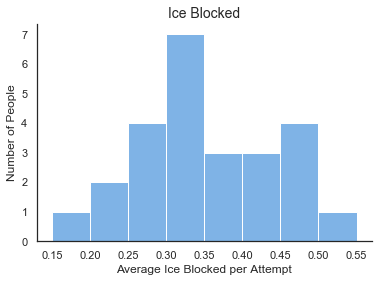

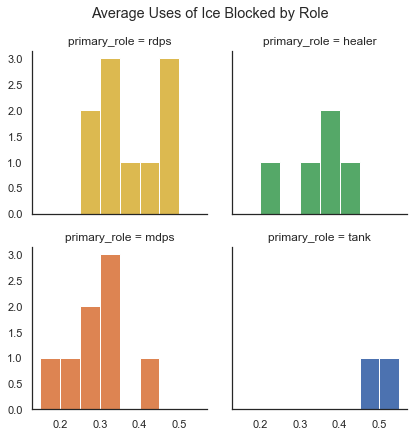

Mean is 0.358130 per attempt.
Median is 0.345154 per attempt.
Max attempts by player is 472.


In [295]:
la.collect_stats(data=frozen_solid, master_list=master_list, player_list=player_list, 
                 boss_name='Jaina', boss_id=2281, spell_name='Ice Blocked', 
                 analysis_columns=['uses'], min_attempts=1, bins=bins)

<a id='touch'></a>
### Chilling Touch

Spell ID: 287993

In [296]:
chilling_touch = wl.buff_duration(api_key, master_list, 287993, boss_id=2281, buff=False)

Player added: Caydd
Player added: Valmet
Player added: Metönymy
Player added: Brianjr
Player added: Ayriea
Player added: Hokk
Player added: Mythroes
Player added: Earrl
Player added: Soome
Player added: Atalya
Player added: Toyqt
Player added: Petroll
Player added: Illestrae
Player added: Irvaeryss
Player added: Shadowbaine
Player added: Jampers
Player added: Kohbee
Player added: Elzam
Player added: Kopyedeep
Player added: Divinance
Player added: Divinance
Player added: Earrl
Player added: Kohbee
Player added: Tawn
Player added: Shadowbaine
Player added: Magria
Player added: Brianjr
Player added: Ayriea
Player added: Shadowfiend
Player added: Risen Skulker
Player added: Toyqt
Player added: Illestrae
Player added: Metönymy
Player added: Valmet
Player added: Caydd
Player added: Bron
Player added: Soome
Player added: Atalya
Player added: Wik'tok
Player added: Hokk
Player added: Kopyedeep
Player added: Tahvee
Player added: Mythroes
Player added: Elzam
Player added: Irvaeryss
Player added: 

Player added: Magria
Player added: Ayriea
Player added: Atalya
Player added: Divinance
Player added: Brianjr
Player added: Kohbee
Player added: Kopyedeep
Player added: Mythroes
Player added: Psychodruid
Player added: Soome
Player added: Shadowbaine
Player added: Illestrae
Player added: Toyqt
Player added: Velryssa
Player added: Lazpep
Player added: Tahvee
Player added: Petroll
Player added: Irvaeryss
Player added: Tawn
Player added: Earrl
Player added: Jampers
Player added: Metönymy
Player added: Caydd
Player added: Caydd
Player added: Soome
Player added: Jampers
Player added: Atalya
Player added: Mythroes
Player added: Divinance
Player added: Tahvee
Player added: Kopyedeep
Player added: Illestrae
Player added: Bron
Player added: Earrl
Player added: Metönymy
Player added: Valmet
Player added: Kohbee
Player added: Shadowbaine
Player added: Magria
Player added: Psychodruid
Player added: Brianjr
Player added: Velryssa
Player added: Water Elemental
Player added: Irvaeryss
Player added: Pet

In [299]:
bins = np.arange(11, 18, 1)

         player     uses  fight_count primary_role   av_count
38  Psychodruid   4819.0        415.0         rdps  11.612048
15        Elzam   3269.0        275.0         mdps  11.887273
0       Acturus   3260.0        273.0       healer  11.941392
48         Tawn   3018.0        251.0         rdps  12.023904
47       Tahvee   4212.0        347.0         rdps  12.138329
50        Toyqt   4495.0        359.0         mdps  12.520891
28    Irvaeryss   5449.0        423.0         mdps  12.881797
29      Jampers   6177.0        472.0       healer  13.086864
3        Ayriea   4496.0        343.0         rdps  13.107872
43        Soome   5011.0        382.0         rdps  13.117801
30       Kohbee   6208.0        470.0         rdps  13.208511
2        Atalya   4545.0        338.0         mdps  13.446746
10        Caydd   3097.0        229.0       healer  13.524017
37      Petroll   5766.0        421.0         rdps  13.695962
53     Velryssa   2530.0        179.0         mdps  14.134078
26    Il

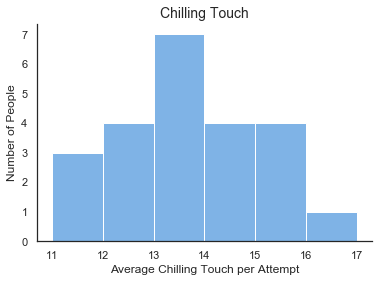

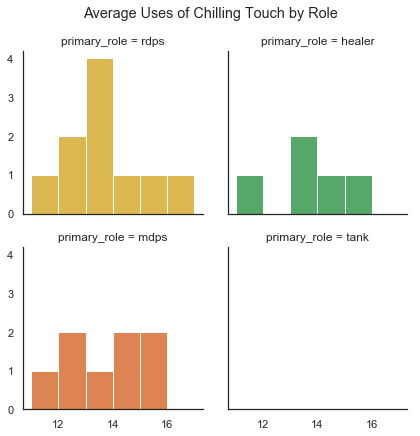

Mean is 15.200347 per attempt.
Median is 13.524017 per attempt.
Max attempts by player is 472.0.


In [300]:
la.collect_stats(data=chilling_touch, master_list=master_list, player_list=player_list, 
                 boss_name='Jaina', boss_id=2281, spell_name='Chilling Touch', 
                 analysis_columns=['uses'], min_attempts=1, bins=bins)

<a id='ray'></a>
### Glacial Ray

Spell ID: 288363

In [303]:
glacial_ray = wl.damage_taken(api_key, master_list, 288363, boss_id=2281, hit_type='hitCount')

Player added: Hokk
Player added: Metönymy
Player added: Kohbee
Player added: Hokk
Player added: Ayriea
Player added: Soome
Player added: Earrl
Player added: Caydd
Player added: Divinance
Player added: Kopyedeep
Player added: Brianjr
Player added: Toyqt
Player added: Illestrae
Player added: Tahvee
Player added: Mythroes
Player added: Earrl
Player added: Soome
Player added: Irvaeryss
Player added: Tahvee
Player added: Kopyedeep
Player added: Caydd
Player added: Metönymy
Player added: Valmet
Player added: Jampers
Player added: Illestrae
Player added: Divinance
Player added: Petroll
Player added: Brianjr
Player added: Acturus
Player added: Hokk
Player added: Shadowbaine
Player added: Soome
Player added: Atalya
Player added: Illestrae
Player added: Irvaeryss
Player added: Velryssa
Player added: Tahvee
Player added: Acturus
Player added: Toyqt
Player added: Metönymy
Player added: Brianjr
Player added: Valmet
Player added: Divinance
Player added: Kohbee
Player added: Hokk
Player added: Mythro

In [305]:
bins = np.arange(0, 0.4, 0.05)

         player   hits  damage_taken  fight_count primary_role  av_count
20        Soome   16.0     1235249.0          382         rdps  0.041885
23       Tahvee   16.0     1299768.0          347         rdps  0.046110
7         Elzam   13.0      947662.0          275         mdps  0.047273
24         Tawn   12.0      939164.0          251         rdps  0.047809
12      Jampers   23.0     1811640.0          472       healer  0.048729
15     Metönymy   24.0     1847894.0          446         rdps  0.053812
18  Psychodruid   24.0     1781696.0          415         rdps  0.057831
2        Ayriea   24.0     1844596.0          343         rdps  0.069971
13       Kohbee   37.0     2989895.0          470         rdps  0.078723
3       Brianjr   39.0     2973820.0          471         mdps  0.082803
27       Valmet   29.0     1813095.0          338         mdps  0.085799
0       Acturus   25.0     1774153.0          273       healer  0.091575
11    Irvaeryss   47.0     3061892.0          423  

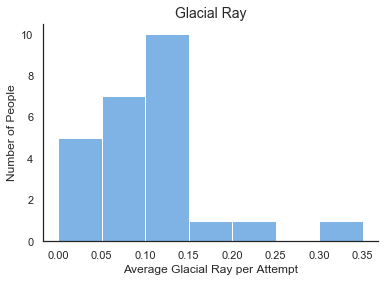

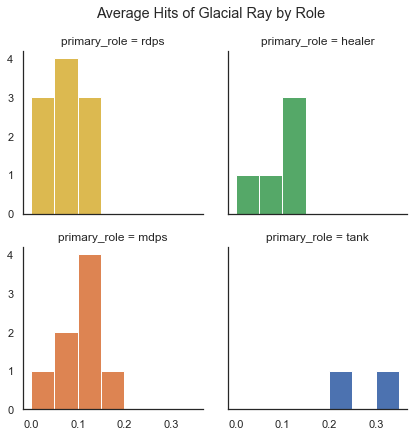

Mean is 0.107251 per attempt.
Median is 0.111111 per attempt.
Max attempts by player is 472.


In [306]:
la.collect_stats(data=glacial_ray, master_list=master_list, player_list=player_list, 
                 boss_name='Jaina', boss_id=2281, spell_name='Glacial Ray', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=1, bins=bins)

<a id='blast'></a>
### Freezing Blast

Spell ID: 285177

In [307]:
freezing_blast = wl.damage_taken(api_key, master_list, 285177, boss_id=2281, hit_type='hitCount')

Player added: Caydd
Player added: Divinance
Player added: Kopyedeep
Player added: Hokk
Player added: Elzam
Player added: Brianjr
Player added: Toyqt
Player added: Irvaeryss
Player added: Kopyedeep
Player added: Jampers
Player added: Elzam
Player added: Metönymy
Player added: Tawn
Player added: Caydd
Player added: Mythroes
Player added: Ayriea
Player added: Divinance
Player added: Hokk
Player added: Shadowbaine
Player added: Soome
Player added: Earrl
Player added: Tahvee
Player added: Kopyedeep
Player added: Tahvee
Player added: Brianjr
Player added: Hokk
Player added: Soome
Player added: Kohbee
Player added: Jampers
Player added: Earrl
Player added: Illestrae
Player added: Metönymy
Player added: Caydd
Player added: Psychodruid
Player added: Elzam
Player added: Valmet
Player added: Divinance
Player added: Petroll
Player added: Acturus
Player added: Ayriea
Player added: Shadowbaine
Player added: Irvaeryss
Player added: Mythroes
Player added: Acturus
Player added: Hokk
Player added: Brian

Player added: Illestrae
Player added: Toyqt
Player added: Irvaeryss
Player added: Hokk
Player added: Shadowbaine
Player added: Earrl
Player added: Mythroes
Player added: Petroll
Player added: Ayriea
Player added: Tahvee
Player added: Divinance
Player added: Kopyedeep
Player added: Psychodruid
Player added: Valmet
Player added: Kohbee
Player added: Brianjr
Player added: Elzam
Player added: Metönymy
Player added: Jampers
Player added: Acturus
Player added: Toyqt
Player added: Atalya
Player added: Illestrae
Player added: Petroll
Player added: Soome
Player added: Jampers
Player added: Irvaeryss
Player added: Velryssa
Player added: Divinance
Player added: Valmet
Player added: Tahvee
Player added: Caydd
Player added: Earrl
Player added: Metönymy
Player added: Kohbee
Player added: Kopyedeep
Player added: Psychodruid
Player added: Tawn
Player added: Mythroes
Player added: Brianjr


In [309]:
bins = np.arange(0.1, 0.55, 0.05)

         player   hits  damage_taken  fight_count primary_role  av_count
1        Atalya   43.0     6734185.0          338         mdps  0.127219
13       Kohbee   61.0     9632960.0          470         rdps  0.129787
7         Elzam   39.0     5991881.0          275         mdps  0.141818
3       Brianjr   69.0    10881167.0          471         mdps  0.146497
27       Valmet   55.0     6851190.0          338         mdps  0.162722
15     Metönymy   84.0    12785243.0          446         rdps  0.188341
25        Toyqt   68.0     9444076.0          359         mdps  0.189415
9          Hokk   68.0    10624850.0          349         mdps  0.194842
24         Tawn   51.0     7958256.0          251         rdps  0.203187
12      Jampers  104.0    16443739.0          472       healer  0.220339
14    Kopyedeep   90.0    13950296.0          396         rdps  0.227273
10    Illestrae  115.0    17137046.0          464       healer  0.247845
5     Divinance  119.0    13111052.0          472  

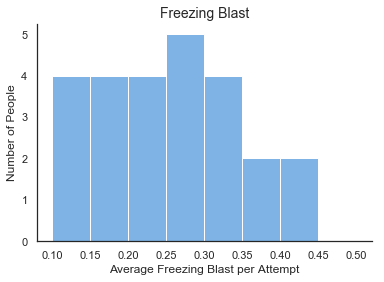

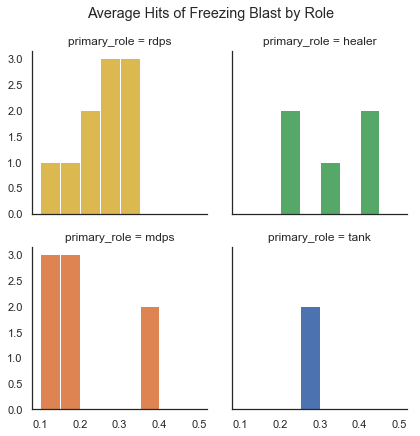

Mean is 0.255224 per attempt.
Median is 0.252119 per attempt.
Max attempts by player is 472.


In [310]:
la.collect_stats(data=freezing_blast, master_list=master_list, player_list=player_list, 
                 boss_name='Jaina', boss_id=2281, spell_name='Freezing Blast', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=1, bins=bins)

<a id='ring'></a>
### Ring of Ice

Spell ID: 285459

In [311]:
ring_of_ice = wl.damage_taken(api_key, master_list, 285459, boss_id=2281, hit_type='hitCount')

Player added: Brianjr
Player added: Atalya
Player added: Hokk
Player added: Irvaeryss
Player added: Kohbee
Player added: Ayriea
Player added: Kopyedeep
Player added: Atalya
Player added: Hokk
Player added: Caydd
Player added: Tahvee
Player added: Brianjr
Player added: Shadowbaine
Player added: Jampers
Player added: Metönymy
Player added: Earrl
Player added: Tawn
Player added: Earrl
Player added: Brianjr
Player added: Shadowbaine
Player added: Illestrae
Player added: Irvaeryss
Player added: Ayriea
Player added: Hokk
Player added: Petroll
Player added: Valmet
Player added: Kopyedeep
Player added: Divinance
Player added: Caydd
Player added: Shadowbaine
Player added: Metönymy
Player added: Earrl
Player added: Kohbee
Player added: Kopyedeep
Player added: Hokk
Player added: Tahvee
Player added: Atalya
Player added: Divinance
Player added: Brianjr
Player added: Divinance
Player added: Brianjr
Player added: Atalya
Player added: Petroll
Player added: Earrl
Player added: Toyqt
Player added: Metö

In [313]:
bins = np.arange(0.01, 0.16, 0.01)

         player   hits  damage_taken  fight_count primary_role  av_count
0       Acturus    5.0      652201.0          273       healer  0.018315
3       Brianjr   12.0     2019341.0          471         mdps  0.025478
7         Elzam    8.0     1346943.0          275         mdps  0.029091
10    Illestrae   14.0     2058979.0          464       healer  0.030172
14    Kopyedeep   12.0     1994253.0          396         rdps  0.030303
16     Mythroes   15.0     2538907.0          449       healer  0.033408
13       Kohbee   18.0     3047422.0          470         rdps  0.038298
24         Tawn   11.0     1805121.0          251         rdps  0.043825
27       Valmet   15.0     1798548.0          338         mdps  0.044379
12      Jampers   22.0     3680030.0          472       healer  0.046610
2        Ayriea   16.0     2684552.0          343         rdps  0.046647
25        Toyqt   17.0     2348930.0          359         mdps  0.047354
17      Petroll   24.0     4008159.0          421  

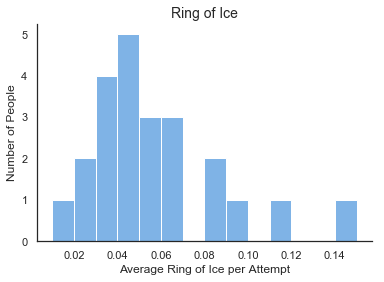

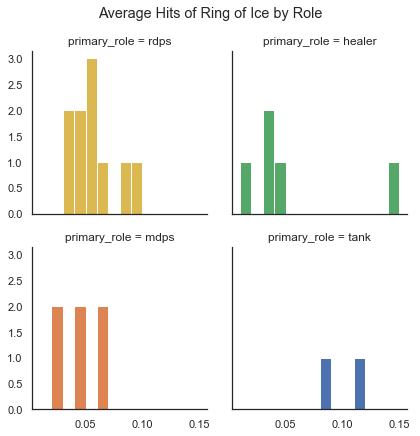

Mean is 0.172003 per attempt.
Median is 0.057007 per attempt.
Max attempts by player is 472.


In [314]:
la.collect_stats(data=ring_of_ice, master_list=master_list, player_list=player_list, 
                 boss_name='Jaina', boss_id=2281, spell_name='Ring of Ice', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=1, bins=bins)

<a id='shards'></a>
### Grasp of Frost (Ice Shards)

Spell ID: 287626

In [315]:
grasp_of_frost = wl.damage_taken(api_key, master_list, 287626, boss_id=2281, hit_type='hitCount')

Player added: Mythroes
Player added: Toyqt
Player added: Kopyedeep
Player added: Soome
Player added: Irvaeryss
Player added: Brianjr
Player added: Kohbee
Player added: Hokk
Player added: Ayriea
Player added: Tahvee
Player added: Jampers
Player added: Toyqt
Player added: Soome
Player added: Shadowbaine
Player added: Hokk
Player added: Tawn
Player added: Irvaeryss
Player added: Elzam
Player added: Brianjr
Player added: Atalya
Player added: Illestrae
Player added: Mythroes
Player added: Kohbee
Player added: Valmet
Player added: Metönymy
Player added: Divinance
Player added: Caydd
Player added: Kopyedeep
Player added: Psychodruid
Player added: Elzam
Player added: Irvaeryss
Player added: Brianjr
Player added: Metönymy
Player added: Jampers
Player added: Ayriea
Player added: Hokk
Player added: Valmet
Player added: Acturus
Player added: Soome
Player added: Earrl
Player added: Caydd
Player added: Kohbee
Player added: Shadowbaine
Player added: Tahvee
Player added: Tawn
Player added: Kopyedeep
P

Player added: Divinance
Player added: Petroll
Player added: Toyqt
Player added: Brianjr
Player added: Irvaeryss
Player added: Mythroes
Player added: Jampers
Player added: Tahvee
Player added: Valmet
Player added: Shadowbaine
Player added: Metönymy
Player added: Kohbee
Player added: Acturus
Player added: Illestrae
Player added: Elzam
Player added: Psychodruid
Player added: Kopyedeep
Player added: Hokk
Player added: Ayriea
Player added: Mythroes
Player added: Toyqt
Player added: Illestrae
Player added: Kopyedeep
Player added: Atalya
Player added: Earrl
Player added: Caydd
Player added: Kohbee
Player added: Metönymy
Player added: Brianjr
Player added: Jampers
Player added: Tahvee
Player added: Psychodruid
Player added: Tawn
Player added: Velryssa
Player added: Valmet
Player added: Irvaeryss
Player added: Petroll
Player added: Soome


In [317]:
bins = np.arange(0.35, 0.7, 0.05)

         player   hits  damage_taken  fight_count primary_role  av_count
6         Earrl   18.0     1321495.0          472         tank  0.038136
5     Divinance   22.0     1612263.0          472         tank  0.046610
24         Tawn   99.0     9893325.0          251         rdps  0.394422
7         Elzam  109.0    10762268.0          275         mdps  0.396364
25        Toyqt  146.0    13603854.0          359         mdps  0.406685
1        Atalya  151.0    15059797.0          338         mdps  0.446746
18  Psychodruid  190.0    18902840.0          415         rdps  0.457831
19  Shadowbaine  180.0    18322426.0          392         rdps  0.459184
4         Caydd  107.0     9973962.0          229       healer  0.467249
9          Hokk  165.0    16437062.0          349         mdps  0.472779
2        Ayriea  164.0    16548796.0          343         rdps  0.478134
0       Acturus  134.0    12647348.0          273       healer  0.490842
12      Jampers  237.0    24006443.0          472  

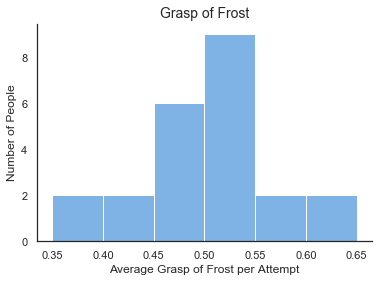

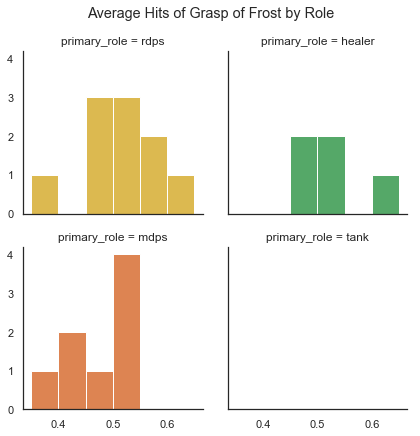

Mean is 0.464406 per attempt.
Median is 0.502119 per attempt.
Max attempts by player is 472.


In [318]:
la.collect_stats(data=grasp_of_frost, master_list=master_list, player_list=player_list, 
                 boss_name='Jaina', boss_id=2281, spell_name='Grasp of Frost', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=1, bins=bins)

<a id='overall'></a>
## Overall

<a id='pots'></a>
### Most Pots Used

Spell IDs:
- Potion of Bursting Blood: 251316
- Potion of Rising Death: 269853
- Battle Potion of Agility: 279152
- Battle Potion of Intellect: 279151
- Battle Potion of Strength: 279153
- Potion of Replinishment: 252753 (is a debuff)
- Coastal Mana Potion: 250871 (is a cast)

In [319]:
pot_buffs = [251316, 269853, 279152, 279151, 279153]

pots = pd.DataFrame([], 
                    columns=['log_id', 'spell_id', 'player', 'duration', 'uses'])

for spell_id in pot_buffs:
    try:
        print('\nSpell Id:', spell_id, '\n')
        spell_df = wl.buff_duration(api_key, master_list, spell_id)
        pots = pd.concat([pots, spell_df])
    except:
        continue


Spell Id: 251316 

Player added: Elzam
Player added: Atalya
Player added: Elzam
Player added: Elzam
Player added: Velryssa
Player added: Elzam
Player added: Atalya
Player added: Atalya
Player added: Elzam
Player added: Elzam
Player added: Velryssa
Player added: Atalya
Player added: Elzam
Player added: Atalya
Player added: Atalya
Player added: Elzam
Player added: Elzam
Player added: Elzam
Player added: Elzam
Player added: Atalya
Player added: Velryssa
Player added: Elzam
Player added: Atalya
Player added: Elzam
Player added: Elzam
Player added: Atalya
Player added: Atalya
Player added: Elzam
Player added: Atalya
Player added: Atalya
Player added: Elzam
Player added: Atalya
Player added: Elzam
Player added: Atalya

Spell Id: 269853 

Player added: Soome
Player added: Soome
Player added: Shadowbaine
Player added: Shadowbaine
Player added: Soome
Player added: Shadowbaine
Player added: Shadowbaine
Player added: Shadowbaine
Player added: Soome
Player added: Shadowbaine
Player added: Shadowb

Player added: Ayriea
Player added: Kohbee
Player added: Divinance
Player added: Brianjr
Player added: Earrl
Player added: Irvaeryss
Player added: Earrl
Player added: Irvaeryss
Player added: Kohbee
Player added: Valmet
Player added: Divinance
Player added: Brianjr
Player added: Ayriea
Player added: Valmet
Player added: Divinance
Player added: Irvaeryss
Player added: Kohbee
Player added: Tahvee
Player added: Ayriea
Player added: Earrl
Player added: Brianjr
Player added: Tahvee
Player added: Valmet
Player added: Brianjr
Player added: Kohbee
Player added: Divinance
Player added: Earrl
Player added: Valmet
Player added: Kohbee
Player added: Divinance
Player added: Earrl
Player added: Ayriea
Player added: Brianjr
Player added: Divinance
Player added: Kohbee
Player added: Ayriea
Player added: Earrl
Player added: Tahvee
Player added: Valmet
Player added: Brianjr
Player added: Kohbee
Player added: Earrl
Player added: Ayriea
Player added: Brianjr
Player added: Divinance
Player added: Valmet
Play

Player added: Kopyedeep
Player added: Stradivarus
Player added: Metönymy
Player added: Soome
Player added: Psychodruid
Player added: Petroll
Player added: Ultray
Player added: Metönymy
Player added: Psychodruid
Player added: Petroll
Player added: Shadowbaine
Player added: Tawn
Player added: Stradivarus
Player added: Metönymy
Player added: Ultray
Player added: Petroll
Player added: Kopyedeep
Player added: Mythroes
Player added: Psychodruid
Player added: Tawn
Player added: Soome
Player added: Shadowbaine
Player added: Kopyedeep
Player added: Metönymy
Player added: Petroll
Player added: Petroll
Player added: Kopyedeep
Player added: Metönymy
Player added: Soome
Player added: Shadowbaine
Player added: Kopyedeep
Player added: Petroll
Player added: Mythroes
Player added: Metönymy
Player added: Psychodruid
Player added: Tawn
Player added: Shadowbaine
Player added: Petroll
Player added: Ultray
Player added: Kopyedeep
Player added: Metönymy
Player added: Tawn
Player added: Stradivarus
Player add

Player added: Kopyedeep
Player added: Psychodruid
Player added: Ultray
Player added: Metönymy
Player added: Shadowbaine
Player added: Tawn
Player added: Petroll
Player added: Shadowbaine
Player added: Kopyedeep
Player added: Petroll
Player added: Metönymy
Player added: Petroll
Player added: Kopyedeep
Player added: Tawn
Player added: Metönymy
Player added: Stradivarus
Player added: Ultray
Player added: Soome
Player added: Tawn
Player added: Kopyedeep
Player added: Petroll
Player added: Metönymy

Spell Id: 279153 

Player added: Hokk
Player added: Atalya
Player added: Toyqt
Player added: Toyqt
Player added: Hokk
Player added: Hokk
Player added: Toyqt
Player added: Stradk
Player added: Velryssa
Player added: Divanance
Player added: Divanance
Player added: Atalya
Player added: Toyqt
Player added: Velryssa
Player added: Elzam
Player added: Toyqt
Player added: Toyqt
Player added: Divanance
Player added: Velryssa
Player added: Velryssa
Player added: Hokk
Player added: Toyqt
Player added: Velr

In [320]:
replenishment = wl.buff_duration(api_key, master_list, 252753, buff=False)

Player added: Mythroes
Player added: Jampers
Player added: Jampers
Player added: Mythroes
Player added: Illestrae
Player added: Caydd
Player added: Acturus
Player added: Jampers
Player added: Mythroes
Player added: Caydd
Player added: Illestrae
Player added: Mythroes
Player added: Mythroes
Player added: Jampers
Player added: Jampers
Player added: Illestrae
Player added: Acturus
Player added: Caydd
Player added: Mythroes
Player added: Caydd
Player added: Jampers
Player added: Jampers
Player added: Caydd
Player added: Mythroes
Player added: Jampers
Player added: Mythroes
Player added: Illestrae
Player added: Caydd
Player added: Jampers
Player added: Mythroes
Player added: Jampers
Player added: Mythroes
Player added: Jampers
Player added: Mythroes
Player added: Mythroes
Player added: Jampers
Player added: Illestrae
Player added: Illestrae
Player added: Jampers
Player added: Mythroes
Player added: Caydd
Player added: Caydd
Player added: Acturus
Player added: Mythroes
Player added: Illestra

In [321]:
mana = wl.cast_count(api_key, master_list, 250871)

Player added: Mythroes
Player added: Soome
Player added: Mythroes
Player added: Jampers
Player added: Mythroes
Player added: Caydd
Player added: Jampers
Player added: Mythroes
Player added: Toyqt
Player added: Mythroes
Player added: Caydd
Player added: Illestrae
Player added: Mythroes
Player added: Mythroes
Player added: Toyqt
Player added: Jampers
Player added: Jampers
Player added: Toyqt
Player added: Mythroes
Player added: Jampers
Player added: Toyqt
Player added: Illestrae
Player added: Mythroes
Player added: Toyqt
Player added: Mythroes
Player added: Jampers
Player added: Toyqt
Player added: Jampers
Player added: Mythroes
Player added: Caydd
Player added: Mythroes
Player added: Mythroes
Player added: Mythroes
Player added: Mythroes
Player added: Jampers
Player added: Caydd
Player added: Mythroes
Player added: Toyqt
Player added: Illestrae
Player added: Toyqt


In [322]:
mana['duration'] = np.nan
mana.columns = ['log_id', 'spell_id', 'player', 'duration', 'uses']

In [323]:
pots = pd.concat([pots, replenishment, mana])

In [327]:
bins = np.arange(0, 1.3, 0.1)

         player  uses  fight_count primary_role  av_count
24         Tawn   966          810         rdps  1.192593
27       Valmet  1108          964         mdps  1.149378
3       Brianjr  1253         1100         mdps  1.139091
14    Kopyedeep  1065          935         rdps  1.139037
13       Kohbee  1114         1038         rdps  1.073218
15     Metönymy  1144         1081         rdps  1.058279
17      Petroll  1110         1061         rdps  1.046183
5     Divinance  1157         1112         tank  1.040468
19  Shadowbaine   913          887         rdps  1.029312
1        Atalya   420          415         mdps  1.012048
7         Elzam   645          640         mdps  1.007812
6         Earrl  1090         1112         tank  0.980216
20        Soome   666          696         rdps  0.956897
28     Velryssa   487          517         mdps  0.941973
2        Ayriea   798          895         rdps  0.891620
25        Toyqt   697          841         mdps  0.828775
23       Tahve

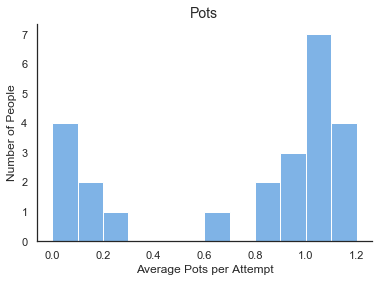

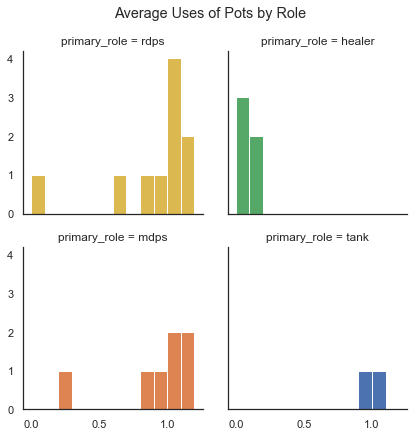

Mean is 0.744901 per attempt.
Median is 0.968556 per attempt.
Max attempts by player is 1112.


In [328]:
la.collect_stats(data=pots, master_list=master_list, player_list=player_list, 
                 boss_name="Overall", boss_id=None, spell_name="Pots", 
                 analysis_columns=['uses'], min_attempts=350, least=False, bins=bins)

<a id='healthstones'></a>
### Most Healthstones/pots
IDs:
- Healthstone: 6262
- Coastal Healing Potion: 250870

In [329]:
stone = wl.cast_count(api_key, master_list, 6262)

Player added: Divinance
Player added: Caydd
Player added: Valmet
Player added: Brianjr
Player added: Kohbee
Player added: Shadowbaine
Player added: Elzam
Player added: Toyqt
Player added: Hokk
Player added: Kopyedeep
Player added: Petroll
Player added: Soome
Player added: Ayriea
Player added: Brianjr
Player added: Metönymy
Player added: Hokk
Player added: Kohbee
Player added: Earrl
Player added: Elzam
Player added: Caydd
Player added: Divinance
Player added: Atalya
Player added: Shadowbaine
Player added: Soome
Player added: Tahvee
Player added: Mythroes
Player added: Jampers
Player added: Kopyedeep
Player added: Tawn
Player added: Irvaeryss
Player added: Ayriea
Player added: Toyqt
Player added: Illestrae
Player added: Earrl
Player added: Shadowbaine
Player added: Valmet
Player added: Psychodruid
Player added: Metönymy
Player added: Ayriea
Player added: Elzam
Player added: Soome
Player added: Kohbee
Player added: Jampers
Player added: Tahvee
Player added: Caydd
Player added: Kopyedeep
P

Player added: Tahvee
Player added: Earrl
Player added: Irvaeryss
Player added: Petroll
Player added: Toyqt
Player added: Mythroes
Player added: Brianjr
Player added: Kopyedeep
Player added: Acturus
Player added: Jampers
Player added: Elzam
Player added: Metönymy
Player added: Divinance
Player added: Stradivarus
Player added: Valmet
Player added: Ultray
Player added: Psychodruid
Player added: Ayriea
Player added: Tawn
Player added: Illestrae
Player added: Psychodruid
Player added: Jampers
Player added: Tawn
Player added: Atalya
Player added: Earrl
Player added: Kopyedeep
Player added: Illestrae
Player added: Ayriea
Player added: Brianjr
Player added: Toyqt
Player added: Valmet
Player added: Elzam
Player added: Kohbee
Player added: Soome
Player added: Acturus
Player added: Mythroes
Player added: Hokk
Player added: Brianjr
Player added: Metönymy
Player added: Jampers
Player added: Earrl
Player added: Mythroes
Player added: Atalya
Player added: Kohbee
Player added: Illestrae
Player added: 

Player added: Earrl
Player added: Shadowbaine
Player added: Petroll
Player added: Ayriea
Player added: Kohbee
Player added: Metönymy
Player added: Caydd
Player added: Mythroes
Player added: Acturus
Player added: Brianjr
Player added: Irvaeryss
Player added: Elzam
Player added: Valmet
Player added: Stradk
Player added: Tahvee
Player added: Psychodruid
Player added: Jampers
Player added: Toyqt
Player added: Illestrae
Player added: Kohbee
Player added: Divinance
Player added: Soome
Player added: Petroll
Player added: Atalya
Player added: Hokk
Player added: Acturus
Player added: Psychodruid
Player added: Brianjr
Player added: Earrl
Player added: Tahvee
Player added: Metönymy
Player added: Illestrae
Player added: Toyqt
Player added: Jampers
Player added: Elzam
Player added: Ayriea
Player added: Shadowbaine
Player added: Metönymy
Player added: Mythroes
Player added: Kohbee
Player added: Atalya
Player added: Divinance
Player added: Shadowbaine
Player added: Psychodruid
Player added: Brianjr
P

In [330]:
heal_pots = wl.cast_count(api_key, master_list, 250870)

Player added: Toyqt
Player added: Kopyedeep
Player added: Soome
Player added: Ayriea
Player added: Petroll
Player added: Metönymy
Player added: Kohbee
Player added: Toyqt
Player added: Tawn
Player added: Ayriea
Player added: Hokk
Player added: Soome
Player added: Atalya
Player added: Elzam
Player added: Kopyedeep
Player added: Metönymy
Player added: Tawn
Player added: Jampers
Player added: Valmet
Player added: Kohbee
Player added: Kopyedeep
Player added: Elzam
Player added: Petroll
Player added: Psychodruid
Player added: Stradk
Player added: Valmet
Player added: Stradivarus
Player added: Kohbee
Player added: Metönymy
Player added: Psychodruid
Player added: Brianjr
Player added: Jampers
Player added: Kopyedeep
Player added: Toyqt
Player added: Petroll
Player added: Ayriea
Player added: Kohbee
Player added: Atalya
Player added: Velryssa
Player added: Valmet
Player added: Petroll
Player added: Psychodruid
Player added: Psychodruid
Player added: Toyqt
Player added: Valmet
Player added: Taw

Player added: Valmet
Player added: Psychodruid
Player added: Ayriea
Player added: Tawn
Player added: Brianjr
Player added: Kohbee
Player added: Toyqt
Player added: Elzam
Player added: Petroll
Player added: Jampers
Player added: Soome
Player added: Kopyedeep
Player added: Velryssa
Player added: Metönymy
Player added: Ayriea
Player added: Tawn
Player added: Psychodruid
Player added: Jampers
Player added: Toyqt
Player added: Valmet
Player added: Kohbee
Player added: Elzam
Player added: Jampers
Player added: Toyqt
Player added: Psychodruid
Player added: Valmet
Player added: Shadowbaine
Player added: Ayriea
Player added: Brianjr
Player added: Petroll
Player added: Kohbee
Player added: Psychodruid
Player added: Divinance
Player added: Kohbee
Player added: Jampers
Player added: Petroll
Player added: Toyqt
Player added: Hokk
Player added: Elzam
Player added: Kopyedeep
Player added: Kohbee
Player added: Divinance
Player added: Psychodruid
Player added: Metönymy
Player added: Atalya
Player added

In [331]:
health_casts = pd.concat([stone, heal_pots])

In [333]:
bins = np.arange(0, 1.2, 0.1)

         player  count  fight_count primary_role  av_count
24         Tawn  811.0          810         rdps  1.001235
14    Kopyedeep  917.0          935         rdps  0.980749
7         Elzam  414.0          640         mdps  0.646875
17      Petroll  651.0         1061         rdps  0.613572
25        Toyqt  420.0          841         mdps  0.499405
0       Acturus  401.0          882       healer  0.454649
3       Brianjr  468.0         1100         mdps  0.425455
13       Kohbee  441.0         1038         rdps  0.424855
1        Atalya  169.0          415         mdps  0.407229
20        Soome  279.0          696         rdps  0.400862
12      Jampers  367.0          990       healer  0.370707
2        Ayriea  301.0          895         rdps  0.336313
10    Illestrae  357.0         1091       healer  0.327223
18  Psychodruid  267.0          954         rdps  0.279874
23       Tahvee  204.0          743         rdps  0.274563
28     Velryssa  118.0          517         mdps  0.2282

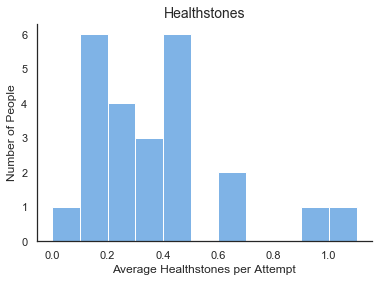

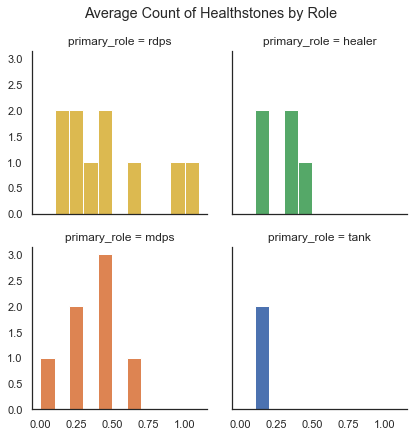

Mean is 0.368703 per attempt.
Median is 0.331768 per attempt.
Max attempts by player is 1112.


In [334]:
la.collect_stats(data=health_casts, master_list=master_list, player_list=player_list, 
                 boss_name="Overall", boss_id=None, spell_name="Healthstones", 
                 analysis_columns=['count'], min_attempts=350, least=False, bins=bins)

<a id='rankings'></a>
### Rankings

In [336]:
player_names = player_list.player.tolist()
alt_names = player_list[~player_list.alt.isna()]['alt'].tolist()
player_names = player_names + alt_names

In [359]:
# Import info for 8.1
wl.import_player_info(player_names, guild_info, api_key, partition=1, zone=21)

Creating file for Irvaeryss for hps
Creating file for Irvaeryss for dps
Creating file for Irvaeryss for tankhps
Creating file for Metönymy for hps
Creating file for Metönymy for dps
Creating file for Metönymy for tankhps
Creating file for Brianjr for hps
Creating file for Brianjr for dps
Creating file for Brianjr for tankhps
Creating file for Petroll for hps
Creating file for Petroll for dps
Creating file for Petroll for tankhps
Creating file for Ayriea for hps
Creating file for Ayriea for dps
Creating file for Ayriea for tankhps
Creating file for Stradivarus for hps
Creating file for Stradivarus for dps
Creating file for Stradivarus for tankhps
Creating file for Earrl for hps
Creating file for Earrl for dps
Creating file for Earrl for tankhps
Creating file for Illestrae for hps
Creating file for Illestrae for dps
Creating file for Illestrae for tankhps
Creating file for Elzam for hps
Creating file for Elzam for dps
Creating file for Elzam for tankhps
Creating file for Tawn for hps
Cre

In [361]:
# Get rankings for 8.1
part1_rankings = wl.get_player_rankings()
# Get top parses for 8.1
top_ranks_1 = la.extract_max_parses()

Missed data for Kushinaa : not in guild
Missed data for Kushinaa : not in guild
Missed data for Kushinaa : not in guild
Missed data for Lichley : not in guild
Missed data for Lichley : not in guild
Missed data for Lichley : not in guild


In [363]:
# Create directory for BoD/8_1
new_folder = 'player_rankings/BoD/8_1'

if not os.path.exists(new_folder):
    os.makedirs(new_folder)

# Move files
current_folder = 'player_rankings'
for file in os.listdir(current_folder):
    if file.endswith('.txt'):
        os.rename(os.path.join(current_folder, file), 
                  os.path.join(new_folder, file))

In [365]:
# Import info for 8.1.5
wl.import_player_info(player_names, guild_info, api_key, partition=2, zone=21)

Creating file for Irvaeryss for hps
Creating file for Irvaeryss for dps
Creating file for Irvaeryss for tankhps
Creating file for Metönymy for hps
Creating file for Metönymy for dps
Creating file for Metönymy for tankhps
Creating file for Brianjr for hps
Creating file for Brianjr for dps
Creating file for Brianjr for tankhps
Creating file for Petroll for hps
Creating file for Petroll for dps
Creating file for Petroll for tankhps
Creating file for Ayriea for hps
Creating file for Ayriea for dps
Creating file for Ayriea for tankhps
Creating file for Stradivarus for hps
Creating file for Stradivarus for dps
Creating file for Stradivarus for tankhps
Creating file for Earrl for hps
Creating file for Earrl for dps
Creating file for Earrl for tankhps
Creating file for Illestrae for hps
Creating file for Illestrae for dps
Creating file for Illestrae for tankhps
Creating file for Elzam for hps
Creating file for Elzam for dps
Creating file for Elzam for tankhps
Creating file for Tawn for hps
Cre

In [366]:
# Get rankings for 8.1.5
part2_rankings = wl.get_player_rankings()
# Get top parses for 8.1.5
top_ranks_2 = la.extract_max_parses()

Missed data for Kushinaa : not in guild
Missed data for Kushinaa : not in guild
Missed data for Kushinaa : not in guild
Missed data for Lichley : not in guild
Missed data for Lichley : not in guild
Missed data for Lichley : not in guild


In [367]:
rankings = pd.concat([top_ranks_1, top_ranks_2])

In [370]:
rankings_df = rankings.groupby(['boss_name', 'player_name'])['percentile'].max().reset_index()
rankings_df = rankings_df.groupby('player_name')['percentile']\
                           .mean().sort_values(ascending=False).reset_index()
rankings_df

,player_name,percentile
0,Hokk,90.200000
1,Mythroes,77.777778
2,Kohbee,77.555556
3,Valmet,77.444444
4,Stradivarus,76.833333
5,Tahvee,76.250000
6,Elzam,74.875000
7,Brianjr,72.555556
8,Tawn,69.250000
9,Jampers,67.777778


In [371]:
rankings_df.to_csv('overall_max_av_parse.csv', index=False)
rankings.to_csv('max_parses.csv', index=False)

In [374]:
bins = np.arange(39.5, 84.5, 5)

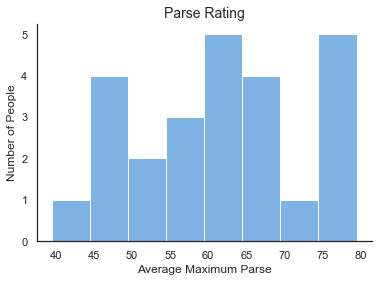

In [376]:
plt.hist(rankings_df.percentile[2:], bins=bins, color='#7fb3e6', edgecolor='white')
plt.title("Parse Rating", fontsize=14)
plt.xlabel("Average Maximum Parse")
plt.ylabel('Number of People');
sns.despine()

In [377]:
rankings_df.percentile[1:].median()

61.951388888888886

<a id='prog-parse'></a>
### Max Progression Parse

In [378]:
# Get only kill logs
first_kills = la.first_kill_logs(master_list)
first_kills.to_csv('first_kill_logs.csv', index=False)

This was eventually done manually - winner Tahvee 98 for ilevel.

<a id='least-damage'></a>
### Least Damage on Progression Kills

In [379]:
least_damage = wl.damage_taken(api_key, first_kills, spell_id=None, hit_type='total')

Player added: Psychodruid
Player added: Mythroes
Player added: Irvaeryss
Player added: Jampers
Player added: Shadowbaine
Player added: Illestrae
Player added: Tahvee
Player added: Metönymy
Player added: Brianjr
Player added: Stradivarus
Player added: Toyqt
Player added: Acturus
Player added: Velryssa
Player added: Kopyedeep
Player added: Earrl
Player added: Kohbee
Player added: Elzam
Player added: Ayriea
Player added: Valmet
Player added: Ultray
Player added: Tawn
Player added: Divinance
Player added: Ethelbeavers
Player added: Petroll
Player added: Illestrae
Player added: Jampers
Player added: Mythroes
Player added: Toyqt
Player added: Psychodruid
Player added: Tahvee
Player added: Tawn
Player added: Elzam
Player added: Earrl
Player added: Ayriea
Player added: Petroll
Player added: Brianjr
Player added: Valmet
Player added: Stradivarus
Player added: Kopyedeep
Player added: Metönymy
Player added: Acturus
Player added: Kohbee
Player added: Ultray
Player added: Divinance
Player added: Ir

In [384]:
# Create column for fight count
least_damage['fight_count'] = 1
# Manage alts
la.change_names(least_damage, player_list)

# Group by players
df_least = least_damage.groupby('player').sum().sort_values('damage_taken')\
           .reset_index()

# Get count for at least 6 fights
df_least = df_least[df_least.fight_count >= 5]
df_least['per_fight'] = df_least.damage_taken/df_least.fight_count
df_least

,player,hits,damage_taken,fight_count,per_fight
4,Irvaeryss,58744838,58744838,5,1.174897e+07
5,Stradivarus,59600228,59600228,5,1.192005e+07
7,Ultray,77803101,77803101,6,1.296718e+07
9,Tahvee,100369891,100369891,5,2.007398e+07
10,Shadowbaine,105359521,105359521,6,1.755992e+07
11,Elzam,106380593,106380593,8,1.329757e+07
12,Kohbee,111081082,111081082,8,1.388514e+07
13,Mythroes,135814003,135814003,8,1.697675e+07
14,Psychodruid,137616513,137616513,7,1.965950e+07
15,Toyqt,139271811,139271811,8,1.740898e+07


In [385]:
bins = np.arange(1.1e7, 2e7, 0.1e7)

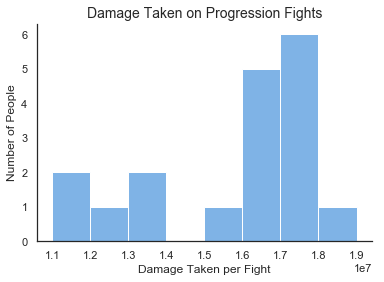

In [386]:
df_least = la.join_player_roles(df_least, player_list)
la.plot_hist(df_least.per_fight[:-2], bins, 'Damage Taken on Progression Fights', 'Damage Taken per Fight')

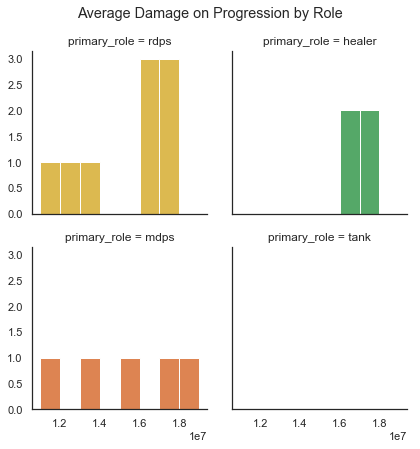

In [388]:
palette=['#dcb950', '#55a868', '#dd8452', '#4c72b0', '#7fb3e6']
g = sns.FacetGrid(df_least, col='primary_role', hue='primary_role',
                      col_wrap=2, palette=palette,
                      col_order=['rdps', 'healer', 'mdps', 'tank'],
                      hue_order=['rdps', 'healer', 'mdps', 'tank'])
g.map(plt.hist, "per_fight", bins=bins, edgecolor='white')
for i in np.arange(2, 4):
    g.axes[i].set_xlabel('')
plt.suptitle("Average Damage on Progression by Role", y=1.04);

In [389]:
df_least.to_csv('guild_awards/overall_least_damage_taken.csv', index=False)